# Objective
The bank has been running a marketing campaign for the last 2 years to attract customers to make a term deposit in order to boost their funds to invest in higher-earning financial products.  Their marketing campaign is primarily conducted over the phone and they have outsourced a call center to help them run this campaign. The call center bills the bank at fixed price/minute and the bank has noticed that the ratio between the amount of customer agreeing to make a term deposit and the number of calls being made are rather low. During the last 2 years, the objective was to call as many customers as possible in hopes that they would make a term deposit, but this has led to excess cost with little return. It is the bank's interest to formulate a marketing strategy by analyzing the marketing data from the last 2 years to reduce the amount of call center cost that will be associated with next year’s marketing campaign.

Term Deposits:

A term deposit a fixed-term deposit, often the deposit of money into an account at a financial institution. Investors that have made term deposits agree not to withdraw their funds until the end of the term, in doing so they are given an incentive of a higher rate of interest paid to the account. The bank uses the funds from the term deposits to invest in higher-earning financial products

Analysis content:
1)	Import libraries and Data

2)	Data cleaning 

        2.1 Clean data used for regression equation 
    
        2.2 Clean data for in depth variable analysis 
    
3)	Analysis 

        3.1 General analysis
    
        3.2 Regression equation
    
        3.3 In depth variable analysis for variable of interest
        
            3.3.1	Age
            
            3.3.2	Job
            
            3.3.3	Marital
            
            3.3.4	Balance, loans and housing
            
            3.3.5	Education
            
            3.3.6	Month
            
            3.3.7	Days
            
            3.3.8	Poutcome
            
            3.3.9	Duration 

4) Insights



# 1) Import Libraries

In [1]:
#a)import python libaries 
import matplotlib as mpl
import matplotlib.pyplot as plt 
import matplotlib.dates as md
%matplotlib inline
import seaborn as sns
import pandas as pd
import statsmodels.api as sm

# Import Data

In [2]:
#b) import dataframe bank data for customer term deposits

bank_df= pd.read_csv('train.csv',sep=';')
print(bank_df.head)
print(bank_df.describe())
print(bank_df.info())






<bound method NDFrame.head of        age           job   marital  education default  balance housing loan  \
0       58    management   married   tertiary      no     2143     yes   no   
1       44    technician    single  secondary      no       29     yes   no   
2       33  entrepreneur   married  secondary      no        2     yes  yes   
3       47   blue-collar   married    unknown      no     1506     yes   no   
4       33       unknown    single    unknown      no        1      no   no   
...    ...           ...       ...        ...     ...      ...     ...  ...   
45206   51    technician   married   tertiary      no      825      no   no   
45207   71       retired  divorced    primary      no     1729      no   no   
45208   72       retired   married  secondary      no     5715      no   no   
45209   57   blue-collar   married  secondary      no      668      no   no   
45210   37  entrepreneur   married  secondary      no     2971      no   no   

         contact  day

null values do not exist 

Category descriptions to keep in mind

housing = has housing loan (yes or no)

loan = has personal loan (yes or no)

duration = last contact duration in seconds and is only recorded after the call is made

campaign = number of contacts made during the current marketing campaign

pdays = number of contact made during the last marketing campaign

previous = the out come of the previous campaign

deposit = results of the current campaign 

# 2) Data Cleaning

# 2.1 Clean data for regression equation

In [6]:
#Clean for regression model
#import dataframe for regression equation 

cleaned_df= pd.read_csv('train.csv',sep=';')
#print(bank_df_reg.head())

#clean deposit column
#relabel columns names
cleaned_df=cleaned_df.rename(columns={'y':'deposit'})
cleaned_df['deposit']= cleaned_df['deposit'].replace(['yes'],1)
cleaned_df['deposit']= cleaned_df['deposit'].replace(['no'],0)


#clean housing by replaying yes and no with binary 1 and 0
cleaned_df['housing']= cleaned_df['housing'].replace(['yes'],1)
cleaned_df['housing']= cleaned_df['housing'].replace(['no'],0)

#clean loan by replaying yes and no with binary 1 and 0
cleaned_df['loan']= cleaned_df['loan'].replace(['yes'],1)
cleaned_df['loan']= cleaned_df['loan'].replace(['no'],0)

#clean default by replaying yes and no with binary 1 and 0
cleaned_df['default']= cleaned_df['default'].replace(['yes'],1)
cleaned_df['default']= cleaned_df['default'].replace(['no'],0)

#for categoric columns  ['job', 'marital', 'education', 'contact', 'month', 'poutcome']
def new_col(col,value):
    
     cleaned_df['newcol']= ""  
     cleaned_df.loc[cleaned_df[col]== value,col+'_'+value]=1
     cleaned_df.loc[cleaned_df[col]!=value,col+'_'+value]=0
        
#clean marital coloumn
new_col('marital','married')
new_col('marital','single')
#new_col('marital','divorced')


#clean job column
#new_col('job','admin.')  
new_col('job','retired')
new_col('job','technician')
new_col('job','management')
new_col('job','services')
new_col('job','unemployed')
new_col('job','housemaid')
new_col('job','blue-collar')
new_col('job','student')
new_col('job','self-employed')
new_col('job','entrepreneur') 
new_col('job','unknown')

#clean for education
new_col('education','tertiary')
new_col('education','secondary')
#new_col('education','primary')
new_col('education','unknown')

#clean for poutcome     
new_col('poutcome','failure')
#new_col('poutcome','other')
new_col('poutcome','success')
new_col('poutcome','unknown')

#clean months
new_col('month','aug')
new_col('month','dec')
new_col('month','feb')
new_col('month','jan')
new_col('month','jul')
new_col('month','jun')
new_col('month','mar')
new_col('month','may')
new_col('month','nov')
new_col('month','oct')
new_col('month','sep')

#clean contact
new_col('contact','telephone')
new_col('contact','unknown')


In [187]:

cleaned_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,...,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
0,58,management,married,tertiary,0,2143,1,0,unknown,5,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,44,technician,single,secondary,0,29,1,0,unknown,5,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,33,entrepreneur,married,secondary,0,2,1,1,unknown,5,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,47,blue-collar,married,unknown,0,1506,1,0,unknown,5,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,33,unknown,single,unknown,0,1,0,0,unknown,5,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


# 2.2 Clean data for in depth analysis

In [7]:
#data cleaning for general anaylsis
#re-label columns names
bank_df=bank_df.rename(columns={'y':'deposit'})


#create a empty column duration status will be used to compare mean values
avg_duration=bank_df['duration'].mean()
print('the avg duration is ',avg_duration)
bank_df['duration status']= ""

bank_df.loc[bank_df['duration']>avg_duration,'duration status']='above avearge'
bank_df.loc[bank_df['duration']<avg_duration,'duration status']='below avearge'


#create age bins
#binning the age groups
bin_age_label=['young(0-19)','young adult(20-29)','adult(30-39)','middle_age(40-59)','senior(60+)']
bins_age_range=[0,19,29,39,59,95]#max age is 95
bank_df['age_group']= pd.cut(bank_df['age'],bins=bins_age_range,labels=bin_age_label)
print(bank_df.head())

bank_df.to_csv('bank_df.csv', index = False)

the avg duration is  258.1630797814691
   age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome deposit  \
0  unknown    5   may       261         1     -1         0  unknown      no   
1  unknown    5   may       151         1     -1         0  unknown      no   
2  unknown    5   may        76         1     -1         0  unknown      no   
3  unknown    5   may        92         1     -1         0  unknown      no   
4  unknown    5   may       198         1     -1         0  unknown      no   

  duration status          age_group  
0 

# 3) Analysis 


#  3.1 General analysis
need to check all categories against deposit, done with count.
Also should keep in mind that customers need to have a substantial balance to make a term deposit 

In [4]:
#count of all categories
for i in bank_df:
    print(bank_df[i].value_counts())
    print ("-" * 20)

    

32    2085
31    1996
33    1972
34    1930
35    1894
      ... 
90       2
92       2
93       2
95       2
94       1
Name: age, Length: 77, dtype: int64
--------------------
blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64
--------------------
married     27214
single      12790
divorced     5207
Name: marital, dtype: int64
--------------------
secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64
--------------------
no     44396
yes      815
Name: default, dtype: int64
--------------------
0        3514
1         195
2         156
4         139
3         134
         ... 
4305        1
6352        1
18881       1
14889       1
7218        1
Name: balance, Length: 7168, dtype: int64
------------

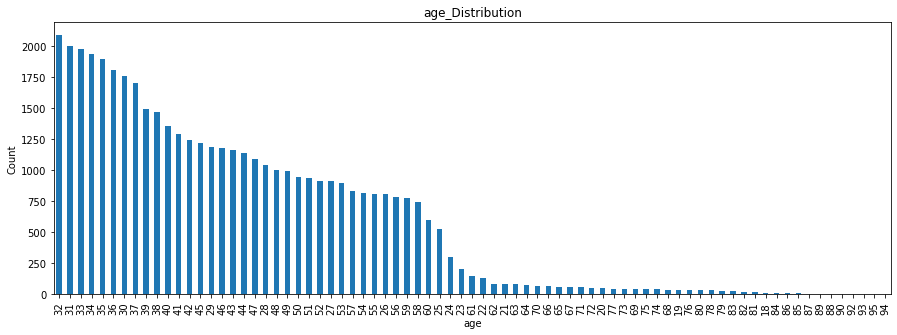

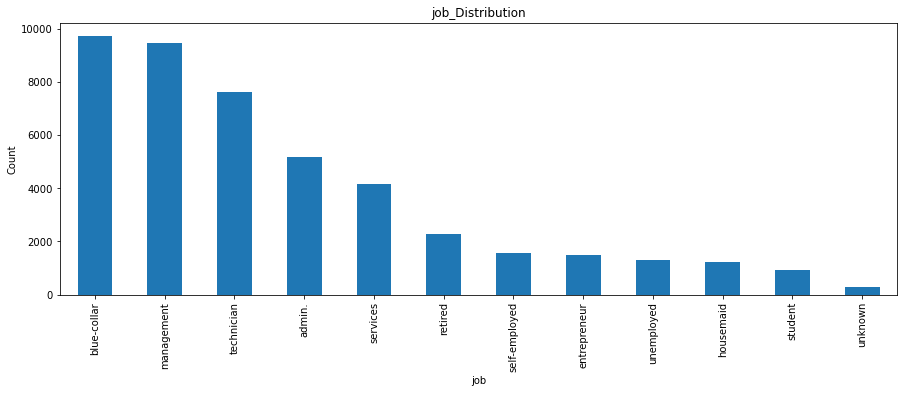

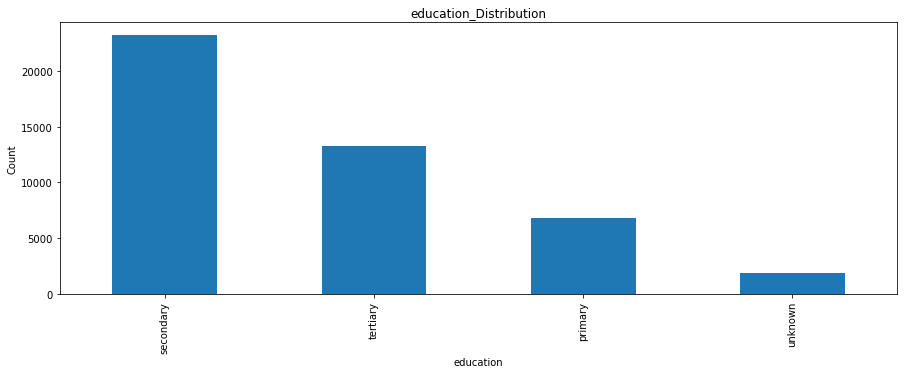

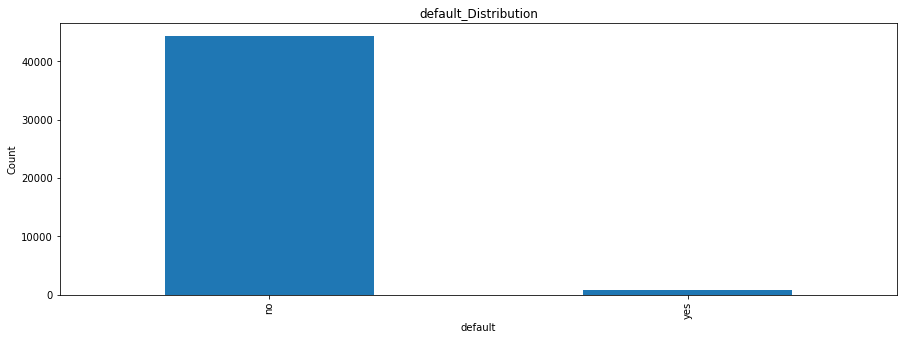

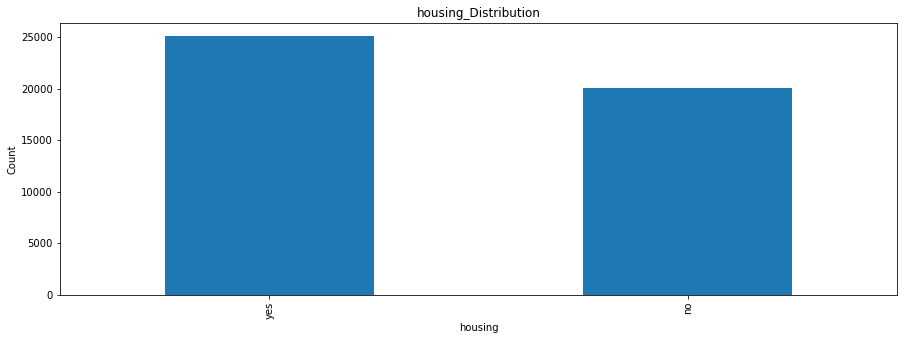

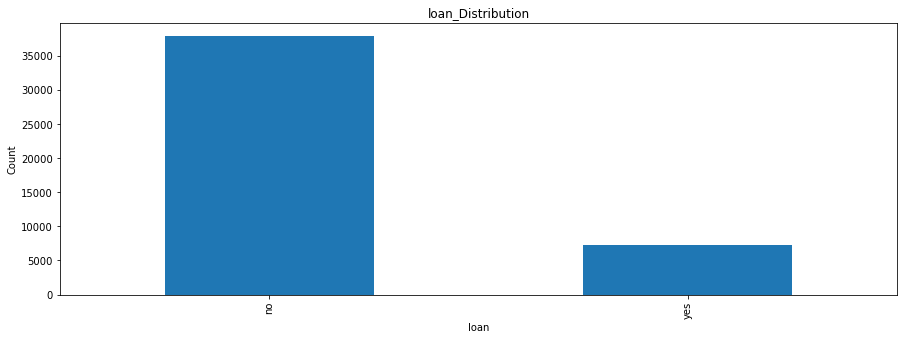

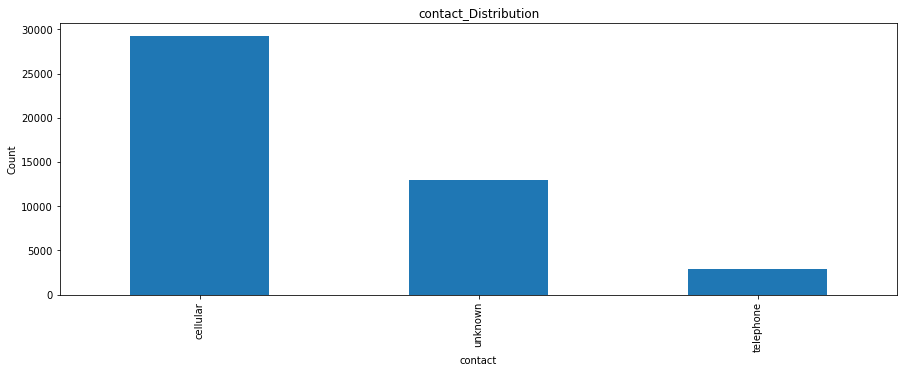

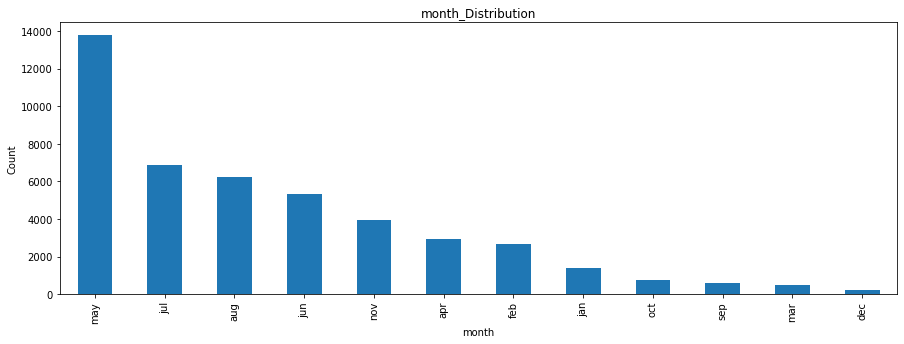

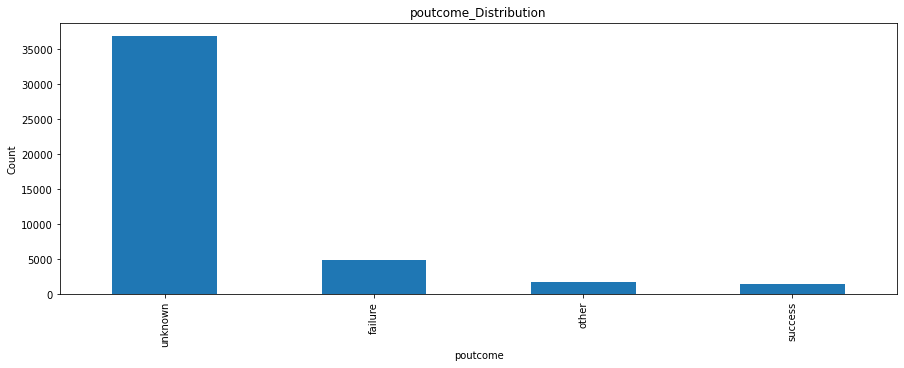

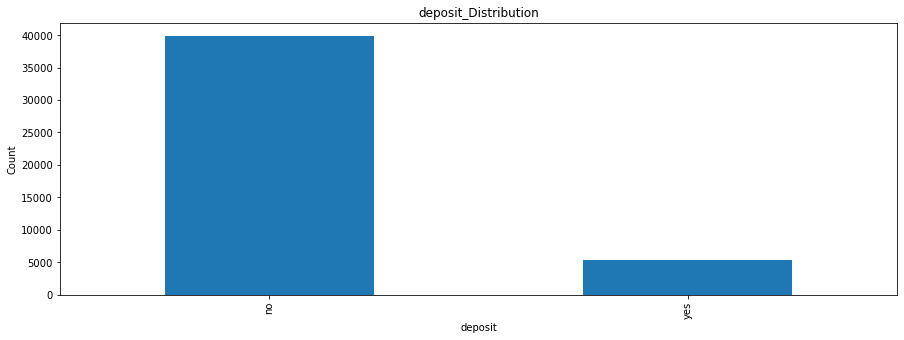

In [7]:
#looking at the count in visual form
import matplotlib.pyplot as plt
from importlib import reload
plt=reload(plt)
#categoric columns
cat_columns=bank_df[['age','job','education','default','housing','loan','contact','month','poutcome','deposit']]
#print(cat_columns.head())

for i in cat_columns:
    fig,ax=plt.subplots(figsize=(15,5))
    bank_df[i].value_counts().plot(kind = 'bar',title=i + '_Distribution')
    plt.ylabel('Count')
    plt.xlabel(i)


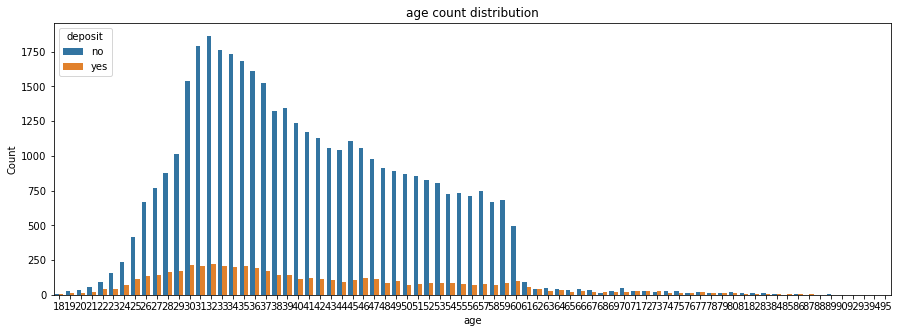

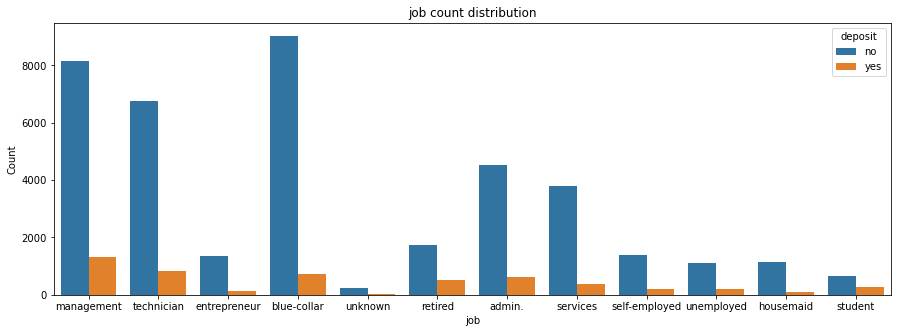

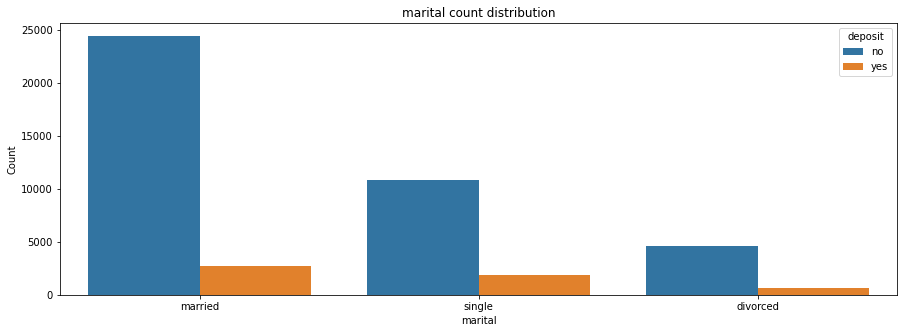

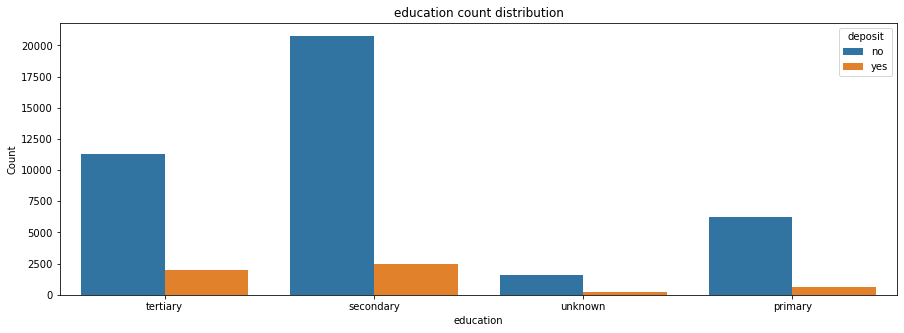

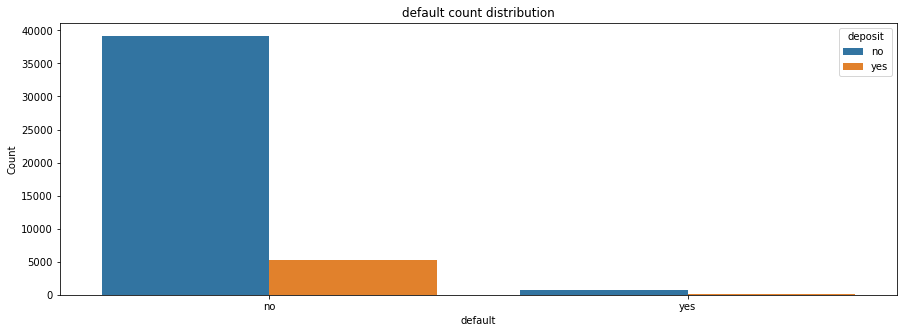

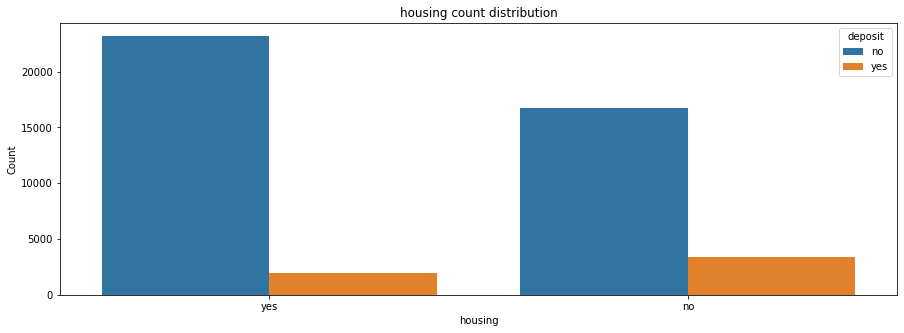

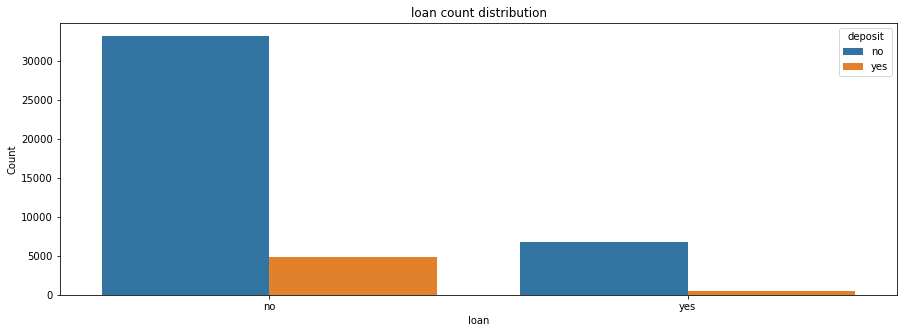

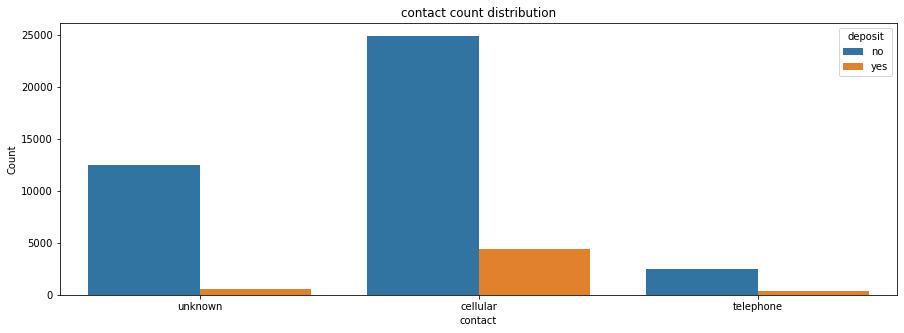

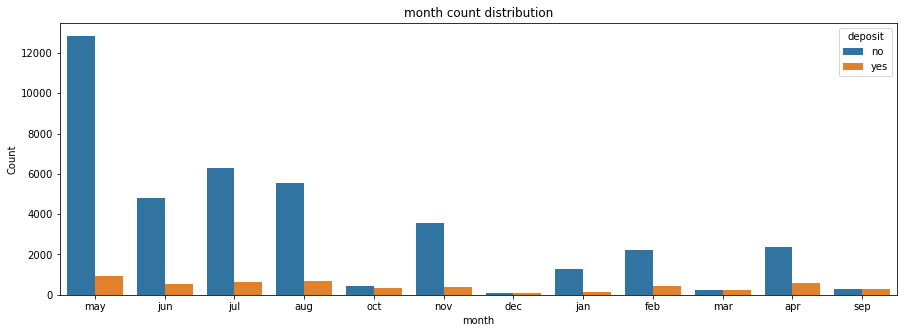

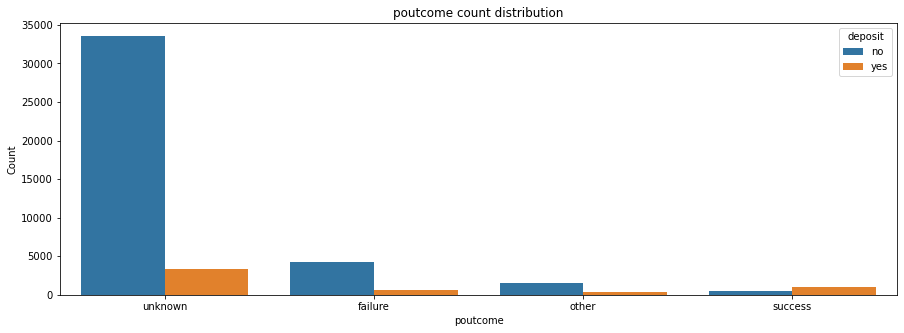

In [8]:
#count with hue of yes no deposits
#categoric columns
cat_columns=bank_df[['age','job','marital','education','default','housing','loan','contact','month','poutcome']]
#print(cat_columns.head())

for i in cat_columns:
    fig,ax=plt.subplots(figsize=(15,5))
    sns.countplot(x=i,data=bank_df,hue='deposit')
    plt.ylabel('Count')
    plt.title(i+' count distribution')

# General yes and no distributions for term deposits

Text(0.5, 1.0, 'Distribution of current term deposits')

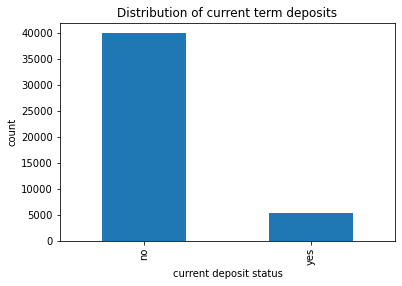

In [8]:
#want to see general view of yes vs no for currrent campaign 
import matplotlib.pyplot as plt
from importlib import reload
plt=reload(plt)
bank_df['deposit'].value_counts().plot(kind = 'bar')
plt.xlabel('current deposit status')
plt.ylabel('count')
plt.title('Distribution of current term deposits')

# 3.2 Regression Equation
model the data to determine which categories have the biggest impact on customers getting a term deposit

This will help with targeted marketing plans to reduce call center calls 


                          age   default   balance   housing      loan  \
age                  1.000000 -0.017879  0.097783 -0.185513 -0.015655   
default             -0.017879  1.000000 -0.066745 -0.006025  0.077234   
balance              0.097783 -0.066745  1.000000 -0.068768 -0.084350   
housing             -0.185513 -0.006025 -0.068768  1.000000  0.041323   
loan                -0.015655  0.077234 -0.084350  0.041323  1.000000   
day                 -0.009120  0.009424  0.004503 -0.027982  0.011370   
duration            -0.004648 -0.010021  0.021560  0.005075 -0.012412   
campaign             0.004760  0.016822 -0.014578 -0.023599  0.009980   
pdays               -0.023758 -0.029979  0.003435  0.124178 -0.022754   
previous             0.001288 -0.018329  0.016674  0.037076 -0.011043   
marital_married      0.286257 -0.014460  0.025708  0.017681  0.036906   
marital_single      -0.427817  0.003115 -0.012537 -0.020475 -0.051716   
job_retired          0.447378 -0.011290  0.046900 -

Text(0.5, 1.0, 'deposit correlations')

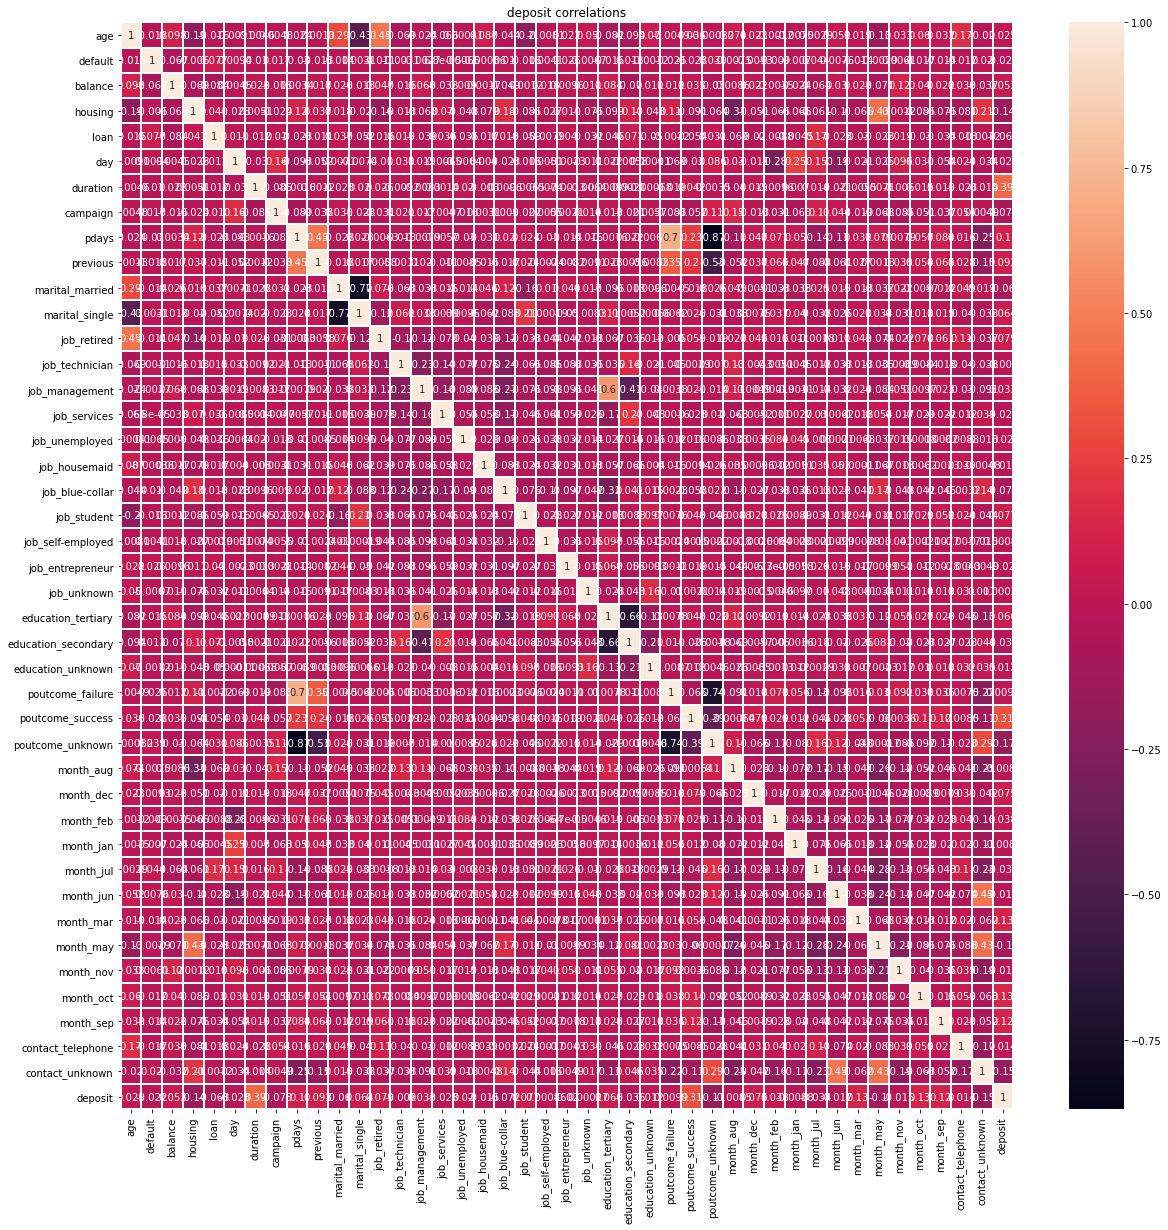

In [12]:
#correlation
#drop deposit column and put in end
df1=cleaned_df.pop('deposit')
cleaned_df['deposit']=df1

plt.figure(figsize=(20,20))
bank_corr1=cleaned_df.corr()
print(bank_corr1)
sns.heatmap(bank_corr1,annot=True,linewidths=1)
plt.title('deposit correlations')

deposit                1.000000
duration               0.394521
poutcome_success       0.306788
month_mar              0.129456
month_oct              0.128531
month_sep              0.123185
pdays                  0.103621
previous               0.093236
job_retired            0.079245
job_student            0.076897
month_dec              0.075164
education_tertiary     0.066448
marital_single         0.063526
balance                0.052838
month_feb              0.038417
job_management         0.032919
age                    0.025155
job_unemployed         0.020390
contact_telephone      0.014042
education_unknown      0.012053
poutcome_failure       0.009885
job_self-employed      0.000855
job_unknown            0.000267
month_aug             -0.008536
month_jan             -0.008783
job_technician        -0.008970
month_nov             -0.014937
job_housemaid         -0.015195
month_jun             -0.016805
job_entrepreneur      -0.019662
default               -0.022419
job_serv

Text(0, 0.5, 'Correlation Coef')

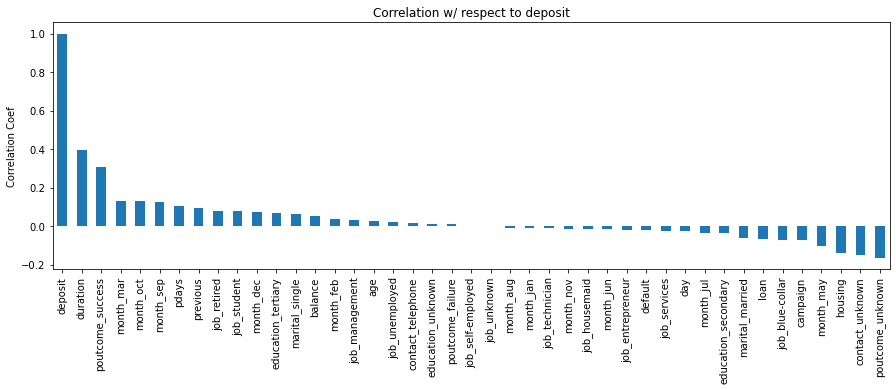

In [7]:
# bar plot for correlation 
plt.subplot(2,1,2)
df_bank_reg_desc = bank_corr1['deposit'].sort_values(ascending=False)
print(df_bank_reg_desc)

df_bank_reg_desc.plot(kind='bar',figsize=(15,10),title = 'Correlation w/ respect to deposit')
plt.ylabel('Correlation Coef')

In [27]:
#OLS 
#subset my indpendant variables as x
independent_variables =['age','balance','day','duration','default','housing','loan','job_blue-collar','job_entrepreneur','job_housemaid','job_management','job_retired','job_self-employed','job_services','job_student','job_technician','job_unemployed','job_unknown','marital_married','marital_single','education_secondary','education_tertiary','education_unknown','contact_telephone','contact_unknown','month_aug','month_dec','month_feb', 'month_jan','month_jul','month_jun','month_mar','month_may','month_nov','month_oct','month_sep','poutcome_failure','poutcome_success','poutcome_unknown','campaign','previous','pdays']
x = cleaned_df[independent_variables]
print(x)

#we need to add an intercept so we add a column of 1s
x = sm.add_constant(x)
print(x)
#sublet pump failure as y
y = cleaned_df['deposit']
model = sm.OLS(y,x).fit()
print(model.summary())

pval=pd.DataFrame(model.pvalues)

       age  balance  day  duration  default  housing  loan  job_blue-collar  \
0       58     2143    5       261        0        1     0              0.0   
1       44       29    5       151        0        1     0              0.0   
2       33        2    5        76        0        1     1              0.0   
3       47     1506    5        92        0        1     0              1.0   
4       33        1    5       198        0        0     0              0.0   
...    ...      ...  ...       ...      ...      ...   ...              ...   
45206   51      825   17       977        0        0     0              0.0   
45207   71     1729   17       456        0        0     0              0.0   
45208   72     5715   17      1127        0        0     0              0.0   
45209   57      668   17       508        0        0     0              1.0   
45210   37     2971   17       361        0        0     0              0.0   

       job_entrepreneur  job_housemaid  ...  month_

                           pvalue
const                1.252812e-09
age                  2.526364e-01
balance              3.738392e-03
day                  2.698204e-08
duration             0.000000e+00
default              9.171274e-01
housing              5.005365e-57
loan                 1.658606e-11
job_blue-collar      2.308173e-04
job_entrepreneur     3.467025e-03
job_housemaid        1.929661e-04
job_management       6.819029e-02
job_retired          1.814991e-04
job_self-employed    8.606158e-03
job_services         2.266449e-02
job_student          1.019341e-12
job_technician       3.333632e-02
job_unemployed       4.802591e-01
job_unknown          1.135730e-01
marital_married      3.994639e-03
marital_single       6.254292e-02
education_secondary  8.359826e-02
education_tertiary   1.891437e-06
education_unknown    1.070460e-01
contact_telephone    2.437210e-02
contact_unknown      4.877925e-91
month_aug            1.800614e-29
month_dec            1.441448e-12
month_feb     

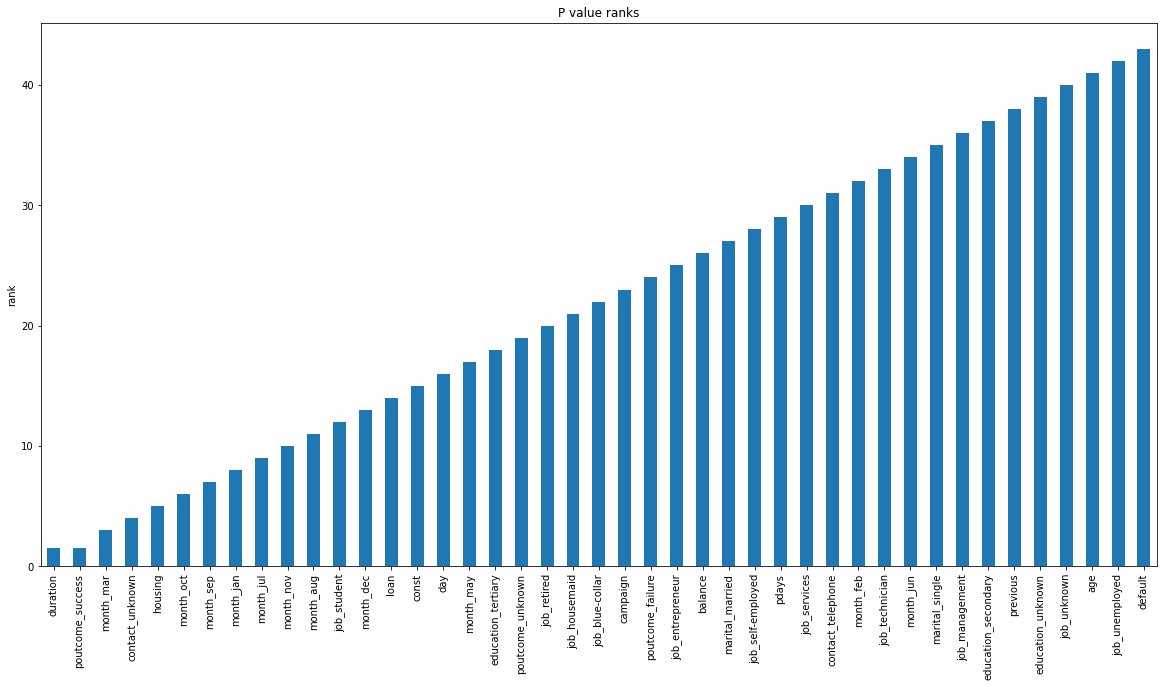

In [9]:
#Pvalue rankings
#rank pvalues
pval=pd.DataFrame(model.pvalues)
pval=pval.rename(columns={0:'pvalue'})
print(pval)

#barplot for rankings
rank = pval['pvalue'].rank(ascending=True).sort_values(ascending=True)

plt.figure(figsize=(20,10))
rank.plot(kind='bar')
plt.title('P value ranks')
plt.ylabel('rank')
print(rank)


# 3.3 In depth analysis


# 3.3.1 Age

Text(0.5, 1.0, 'Age Distribution with and without term deposits')

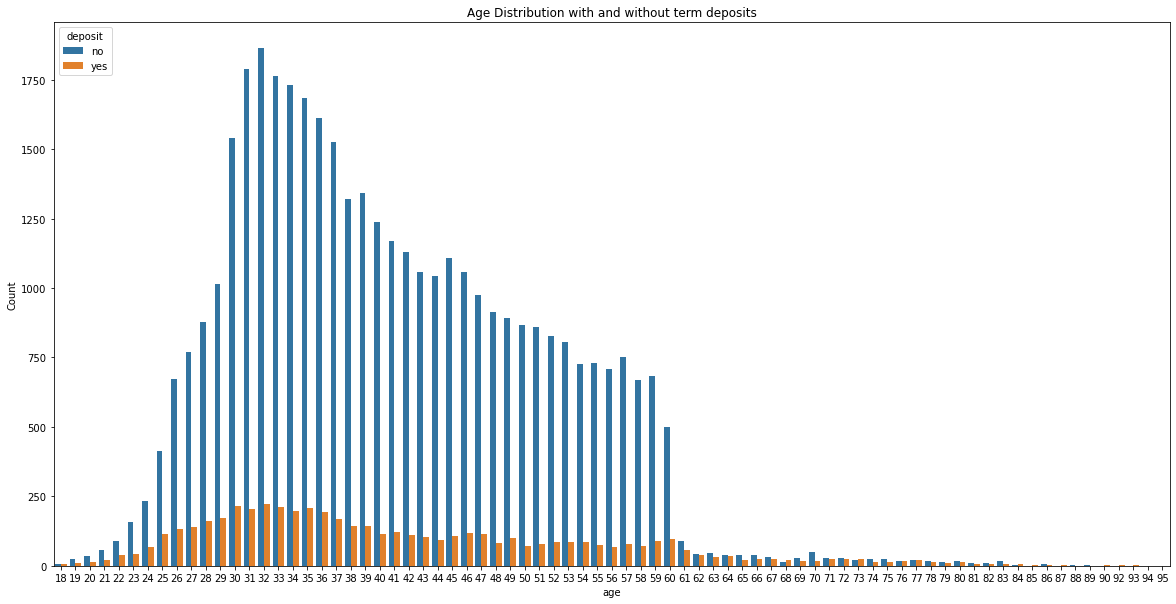

In [39]:
#age count distrbution of deposits
plt.figure(figsize=(20,10))
sns.countplot(x='age',data=bank_df,hue='deposit')
plt.ylabel('Count')
plt.title('Age Distribution with and without term deposits')


young(0-19)              47
young adult(20-29)     5226
adult(30-39)          18089
middle_age(40-59)     20065
senior(60+)            1784
Name: age_group, dtype: int64
--------------------
young(0-19)             10
young adult(20-29)     698
adult(30-39)          2705
middle_age(40-59)     2552
senior(60+)            447
Name: age_group, dtype: int64
--------------------
Yes proportion for age_group category
young(0-19)           0.382979
young adult(20-29)    0.174129
adult(30-39)          0.105755
middle_age(40-59)     0.092101
senior(60+)           0.336323
Name: age_group, dtype: float64
------------------------------------------------------------
No proportion for age_group category
young(0-19)           0.617021
young adult(20-29)    0.825871
adult(30-39)          0.894245
middle_age(40-59)     0.907899
senior(60+)           0.663677
Name: age_group, dtype: float64
------------------------------------------------------------
Yes proportion for age_group category poutcome w/o u

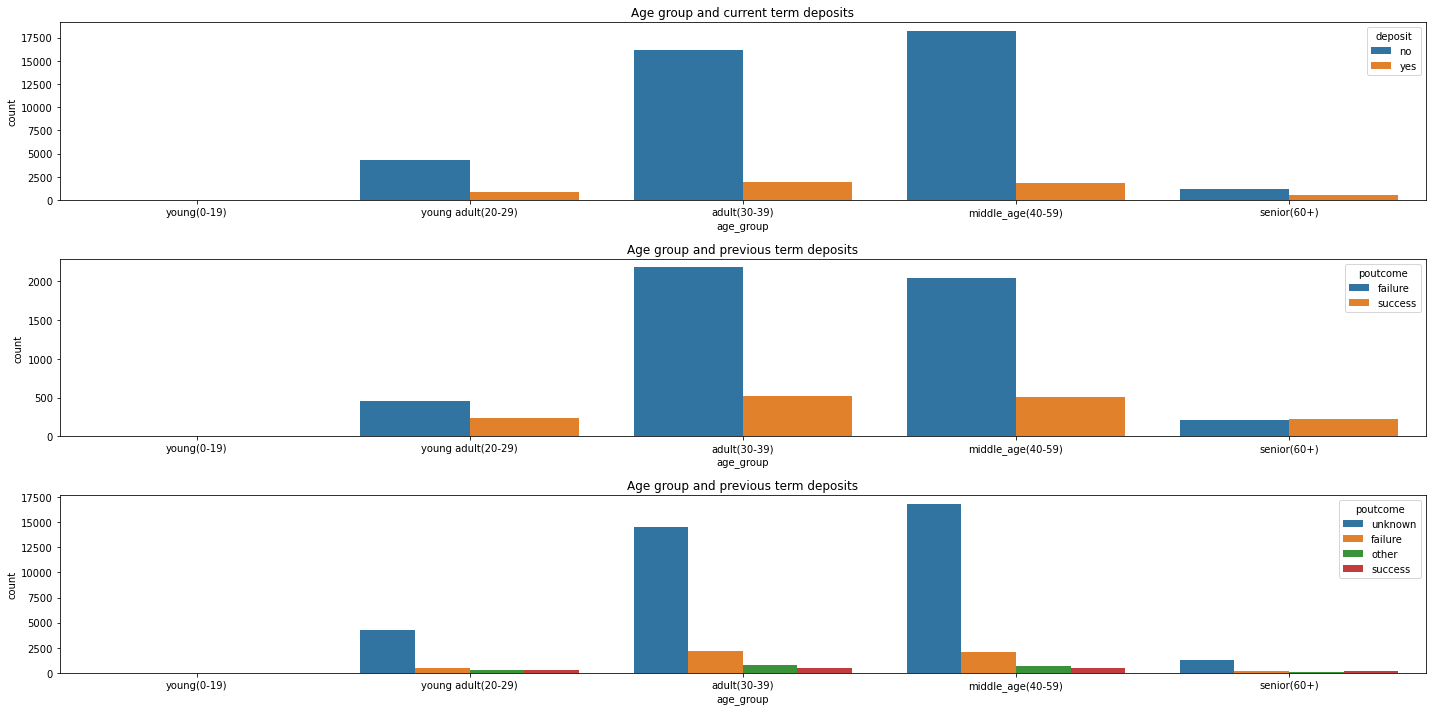

In [28]:
#use binning for the age_groups

plt.figure(figsize=(20,10))
plt.subplot(3,1,1)
sns.countplot(x='age_group',data=bank_df,hue='deposit')
plt.title('Age group and current term deposits')

#count previous outcome per age group, removed unknowns and others
plt.subplot(3,1,2)
sns.countplot(x='age_group',data=bank_df[(bank_df['poutcome']!='unknown')&(bank_df['poutcome']!='other')],hue='poutcome')
plt.title('Age group and previous term deposits')

plt.subplot(3,1,3)
sns.countplot(x='age_group',data=bank_df,hue='poutcome')
plt.title('Age group and previous term deposits')
plt.tight_layout()

#count all rows for age group
count=bank_df['age_group'].value_counts(sort=False)
print(count)
print('-'*20)

#count only those rows that dont include poutcome equal to unknown and other
bank_df2=bank_df[(bank_df['poutcome']!='unknown')&(bank_df['poutcome']!='other')]
count2=bank_df2['age_group'].value_counts(sort=False)
print(count2)
print('-'*20)

count=bank_df['age_group'].value_counts(sort=False)
age_deposits=bank_df[['age_group','deposit']]
age_deposits2=bank_df2[['age_group','poutcome']]
age_deposits3=bank_df[['age_group','poutcome']]

#combine function
#function that calcuates the proportion of yes and no term deposits for a certain column 
def prop(Full_count,df,group_column,status_column):
    x=df[df[status_column]=='yes'][group_column].value_counts(sort=False)
    y=df[df[status_column]=='no'][group_column].value_counts(sort=False)
    print('Yes proportion for',group_column,'category')
    print(x/Full_count)
    print('---'*20)
    print('No proportion for',group_column,'category')
    print(y/Full_count)
prop(count,age_deposits,'age_group','deposit')

print('---'*20)

#combine function for poutcome w/o unknowns and others
#function that calcuates the proportion of yes and no term deposits for a certain column 
def prop(Full_count,df,group_column,status_column):
    x=df[df[status_column]=='success'][group_column].value_counts(sort=False)
    y=df[df[status_column]=='failure'][group_column].value_counts(sort=False)
    print('Yes proportion for',group_column,'category poutcome w/o unknowns')
    print(x/Full_count)
    print('---'*20)
    print('No proportion for',group_column,'category poutcome w/o unknowns')
    print(y/Full_count)
prop(count2,age_deposits2,'age_group','poutcome')

print('---'*20)

#combine function for poutcome all
#function that calcuates the proportion of yes and no term deposits for a certain column 
def prop(Full_count,df,group_column,status_column):
    x=df[df[status_column]=='success'][group_column].value_counts(sort=False)
    y=df[df[status_column]=='failure'][group_column].value_counts(sort=False)
    o=df[df[status_column]=='other'][group_column].value_counts(sort=False)
    u=df[df[status_column]=='unknown'][group_column].value_counts(sort=False)
    print('Yes proportion for',group_column,'category poutcome')
    print(x/Full_count)
    print('No proportion for',group_column,'category poutcome')
    print(y/Full_count)
    print('other proportion for',group_column,'category poutcome')
    print(o/Full_count)
    print('unknown proportion for',group_column,'category poutcome')
    print(u/Full_count)
prop(count,age_deposits3,'age_group','poutcome')





This tells us that seniors and those in the age group 20-29 have a higer ratio of saying yes to term deposits

most job categories are similar when it come to distrbuiton of age except for retired and student
medain balance in all job categories are also similar


Text(0.5, 1.0, 'balance distribution by job')

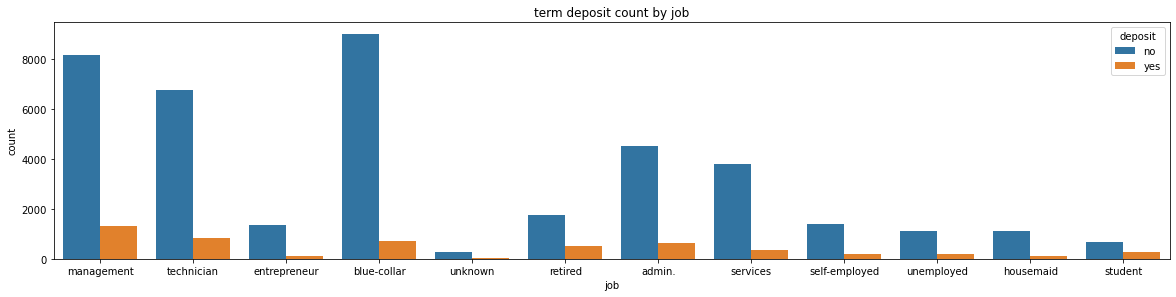

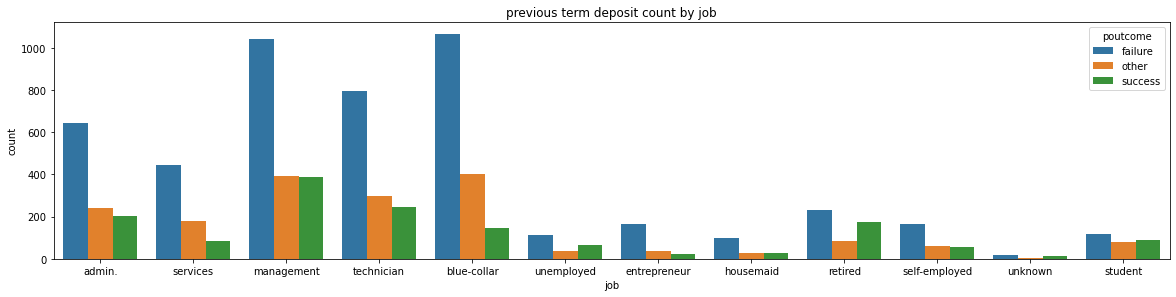

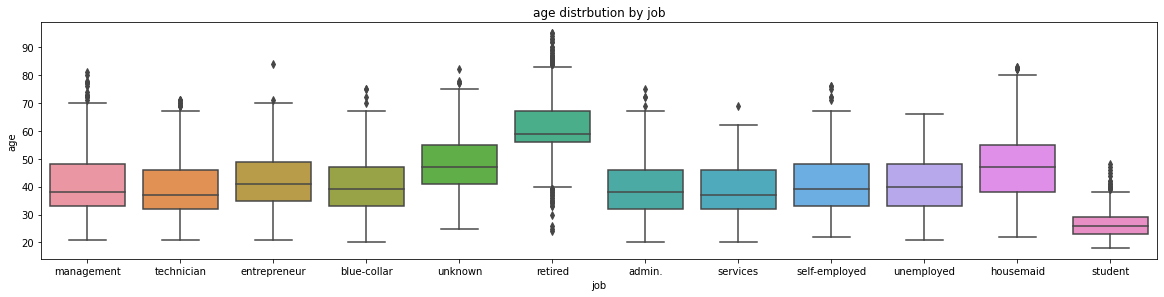

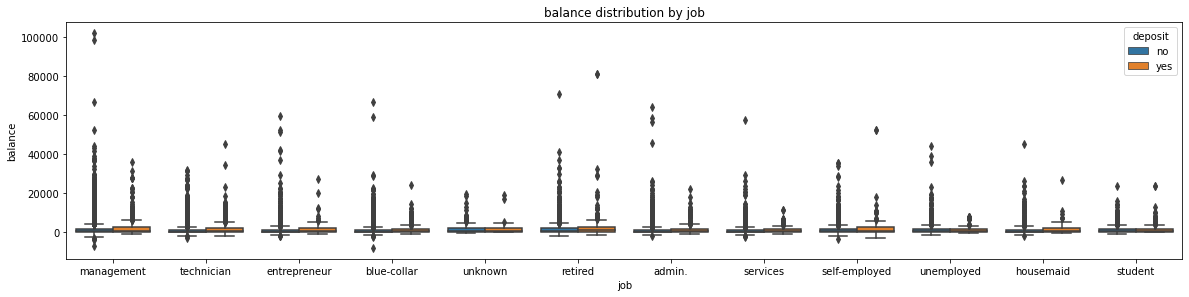

In [8]:
#age and occupation 
plt.figure(figsize=(20,20))
plt.subplot(4,1,2)
sns.countplot(x='job',data=bank_df,hue='deposit')
plt.title('term deposit count by job')

plt.figure(figsize=(20,20))
plt.subplot(4,1,2)
sns.countplot(x='job',data=bank_df[bank_df['poutcome']!='unknown'],hue='poutcome')
plt.title('previous term deposit count by job')

plt.figure(figsize=(20,20))
plt.subplot(4,1,3)
sns.boxplot(x='job',y='age',data=bank_df)
plt.title('age distrbution by job')


#job and balance
plt.figure(figsize=(20,20))
plt.subplot(4,1,4)
sns.boxplot(x='job',y='balance',hue='deposit',data=bank_df)
plt.title('balance distribution by job')

Most job categories are similar when it comes to the distribution of age except for retired and student customers.
Median balance in all job categories are also very similar.

# 3.3.2 Job

            job deposit
0    management      no
1    technician      no
2  entrepreneur      no
3   blue-collar      no
4       unknown      no
--------------------
deposit  job          
no       admin.           4540
         blue-collar      9024
         entrepreneur     1364
         housemaid        1131
         management       8157
         retired          1748
         self-employed    1392
         services         3785
         student           669
         technician       6757
         unemployed       1101
         unknown           254
yes      admin.            631
         blue-collar       708
         entrepreneur      123
         housemaid         109
         management       1301
         retired           516
         self-employed     187
         services          369
         student           269
         technician        840
         unemployed        202
         unknown            34
Name: job, dtype: int64
--------------------
total Count of jobs cat

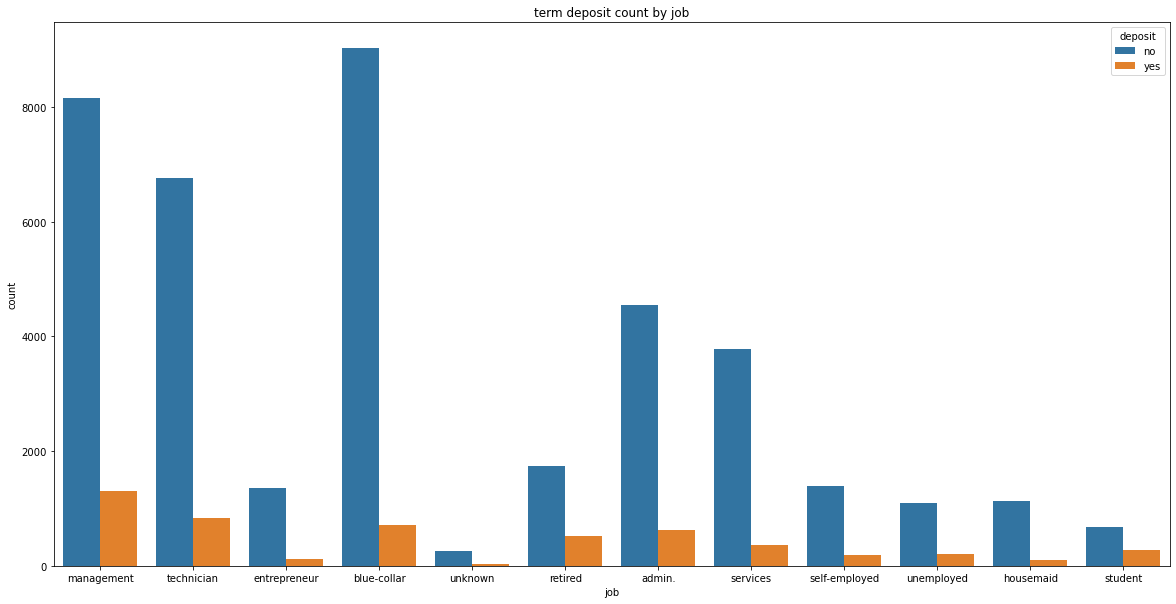

In [43]:
#current campaign
#job count distrbution of deposits
plt.figure(figsize=(20,10))
sns.countplot(x='job',data=bank_df,hue='deposit')
plt.ylabel='Count'
plt.title('term deposit count by job')

#df that represents only job and deposit columns
job_dep_df=bank_df[['job','deposit']]
print(job_dep_df.head())
print('-'*20)

#total count of the unique jobs grouped by yes and no deposit terms
print(job_dep_df.groupby('deposit')['job'].value_counts(sort=False))
print('-'*20)

#total count of unique jobs in the column
print("total Count of jobs categories")
count=job_dep_df['job'].value_counts(sort=False)
print(count)
print('-'*20)


#combine function
#function that calcuates the proportion of yes and no term deposits for a certain column 
def prop(Full_count,df,group_column,status_column):
    x=df[df[status_column]=='yes'][group_column].value_counts(sort=False)
    y=df[df[status_column]=='no'][group_column].value_counts(sort=False)
    print('Yes proportion for',group_column,'category')
    print(x/Full_count)
    print('---'*20)
    print('No proportion for',group_column,'category')
    print(y/Full_count)
prop(count,job_dep_df,'job','deposit')




poutcome  job          
failure   admin.            643
          blue-collar      1068
          entrepreneur      164
          housemaid          97
          management       1044
          retired           230
          self-employed     165
          services          444
          student           117
          technician        797
          unemployed        112
          unknown            20
other     admin.            241
          blue-collar       401
          entrepreneur       39
          housemaid          26
          management        393
          retired            83
          self-employed      61
          services          177
          student            81
          technician        299
          unemployed         37
          unknown             2
success   admin.            204
          blue-collar       148
          entrepreneur       22
          housemaid          29
          management        387
          retired           174
          self-e

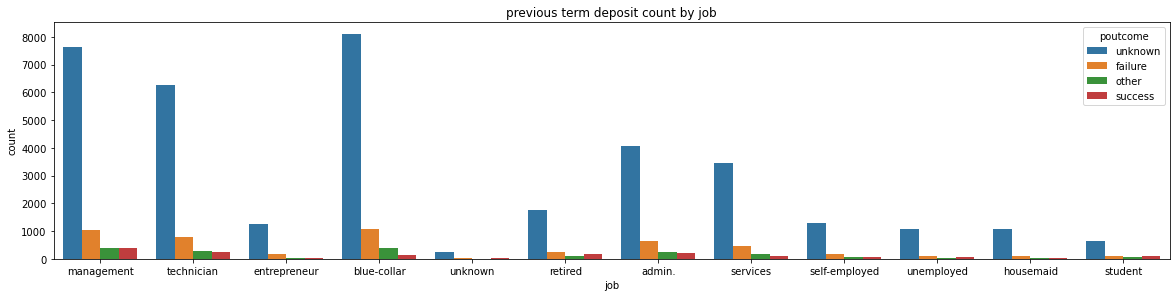

In [45]:
#previous campaign 
plt.figure(figsize=(20,20))
plt.subplot(4,1,2)
sns.countplot(x='job',data=bank_df,hue='poutcome')
plt.title('previous term deposit count by job')

#df that only represents job an poutcome
job_dep_df3=bank_df[['job','poutcome']]

#total count of the unique jobs grouped by yes and no deposit terms
print(job_dep_df3.groupby('poutcome')['job'].value_counts(sort=False))
print('-'*20)

#count only those rows that dont include poutcome equal to unknown and other
count3=job_dep_df3['job'].value_counts(sort=False)
print(count3)
print('-'*20)


#combine function for poutcome w/o unknowns and others
#function that calcuates the proportion of yes and no term deposits for a certain column 
def prop(Full_count,df,group_column,status_column):
    x=df[df[status_column]=='success'][group_column].value_counts(sort=False)
    y=df[df[status_column]=='failure'][group_column].value_counts(sort=False)
    o=df[df[status_column]=='other'][group_column].value_counts(sort=False)
    u=df[df[status_column]=='unknown'][group_column].value_counts(sort=False)
    print('Yes proportion for',group_column,'category poutcome')
    print(x/Full_count)
    print('No proportion for',group_column,'category poutcome')
    print(y/Full_count)
    print('other proportion for',group_column,'category poutcome')
    print(o/Full_count)
    print('unknown proportion for',group_column,'category poutcome')
    print(u/Full_count)
prop(count3,job_dep_df3,'job','poutcome')

poutcome  job          
failure   admin.            643
          blue-collar      1068
          entrepreneur      164
          housemaid          97
          management       1044
          retired           230
          self-employed     165
          services          444
          student           117
          technician        797
          unemployed        112
          unknown            20
success   admin.            204
          blue-collar       148
          entrepreneur       22
          housemaid          29
          management        387
          retired           174
          self-employed      55
          services           85
          student            87
          technician        245
          unemployed         64
          unknown            11
Name: job, dtype: int64
--------------------
services          529
student           204
entrepreneur      186
housemaid         126
technician       1042
retired           404
unemployed        176
blue-coll

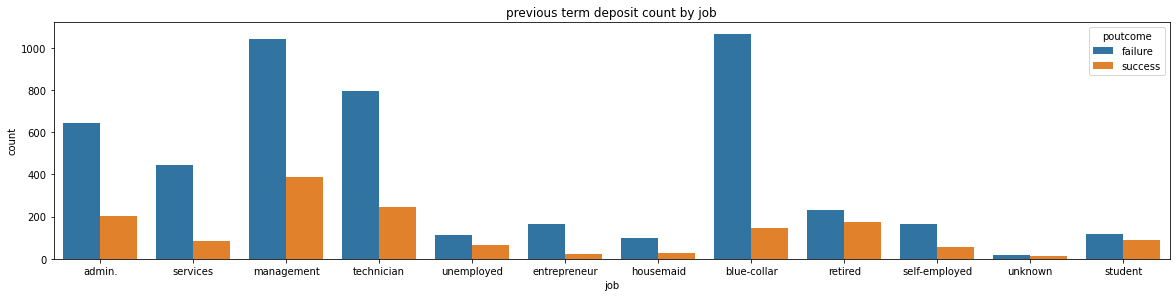

In [29]:
#previous campaign w/o unkown and other
plt.figure(figsize=(20,20))
plt.subplot(4,1,2)
sns.countplot(x='job',data=bank_df[(bank_df['poutcome']!='unknown')&(bank_df['poutcome']!='other')],hue='poutcome')
plt.title('previous term deposit count by job')

#df that only represents job and poutcome
job_dep_df2=bank_df2[['job','poutcome']]

#total count of the unique jobs grouped by yes and no deposit terms
print(job_dep_df2.groupby('poutcome')['job'].value_counts(sort=False))
print('-'*20)

#count only those rows that dont include poutcome equal to unknown and other
job_dep_df2=job_dep_df2[(job_dep_df2['poutcome']!='unknown')&(job_dep_df2['poutcome']!='other')]
count2=job_dep_df2['job'].value_counts(sort=False)
print(count2)
print('-'*20)


#combine function for poutcome w/o unknowns and others
#function that calcuates the proportion of yes and no term deposits for a certain column 
def prop(Full_count,df,group_column,status_column):
    x=df[df[status_column]=='success'][group_column].value_counts(sort=False)
    y=df[df[status_column]=='failure'][group_column].value_counts(sort=False)
    print('Yes proportion for',group_column,'category poutcome w/o unknowns')
    print(x/Full_count)
    print('---'*20)
    print('No proportion for',group_column,'category poutcome w/o unknowns')
    print(y/Full_count)
prop(count2,job_dep_df2,'job','poutcome')


# 3.3.3 Marital

            job deposit
0    management      no
1    technician      no
2  entrepreneur      no
3   blue-collar      no
4       unknown      no
--------------------
deposit  marital 
no       divorced     4585
         married     24459
         single      10878
yes      divorced      622
         married      2755
         single       1912
Name: marital, dtype: int64
--------------------
total Count of marital status categories
divorced     5207
married     27214
single      12790
Name: marital, dtype: int64
--------------------
Yes proportion for marital category
divorced    0.119455
married     0.101235
single      0.149492
Name: marital, dtype: float64
------------------------------------------------------------
No proportion for marital category
divorced    0.880545
married     0.898765
single      0.850508
Name: marital, dtype: float64


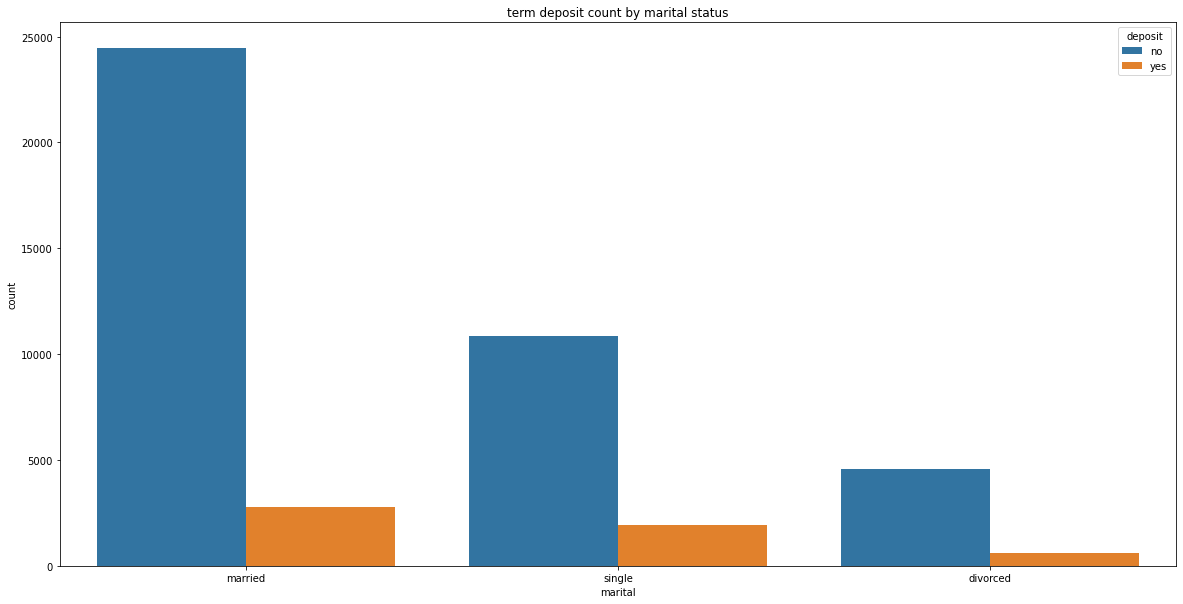

In [46]:
#marital status
#marital status count distrbution of deposits
plt.figure(figsize=(20,10))
sns.countplot(x='marital',data=bank_df,hue='deposit')
plt.ylabel='Count'
plt.title('term deposit count by marital status')

#df that represents only marital and deposit columns
mar_dep_df=bank_df[['marital','deposit']]
print(job_dep_df.head())
print('-'*20)

#total count of the unique marital status grouped by yes and no deposit terms
print(mar_dep_df.groupby('deposit')['marital'].value_counts(sort=False))
print('-'*20)

#total count of unique marital status in the column
print("total Count of marital status categories")
count=mar_dep_df['marital'].value_counts(sort=False)
print(count)
print('-'*20)


#combine function
#function that calcuates the proportion of yes and no term deposits for a certain column 
def prop(Full_count,df,group_column,status_column):
    x=df[df[status_column]=='yes'][group_column].value_counts(sort=False)
    y=df[df[status_column]=='no'][group_column].value_counts(sort=False)
    print('Yes proportion for',group_column,'category')
    print(x/Full_count)
    print('---'*20)
    print('No proportion for',group_column,'category')
    print(y/Full_count)
prop(count,mar_dep_df,'marital','deposit')


poutcome  marital 
failure   divorced      556
          married      2919
          single       1426
other     divorced      223
          married       987
          single        630
success   divorced      152
          married       836
          single        523
unknown   divorced     4276
          married     22472
          single      10211
Name: marital, dtype: int64
--------------------
divorced     708
married     3755
single      1949
Name: marital, dtype: int64
--------------------
Yes proportion for marital category poutcome w/o unknowns
divorced    0.214689
married     0.222636
single      0.268343
Name: marital, dtype: float64
------------------------------------------------------------
No proportion for marital category poutcome w/o unknowns
divorced    0.785311
married     0.777364
single      0.731657
Name: marital, dtype: float64


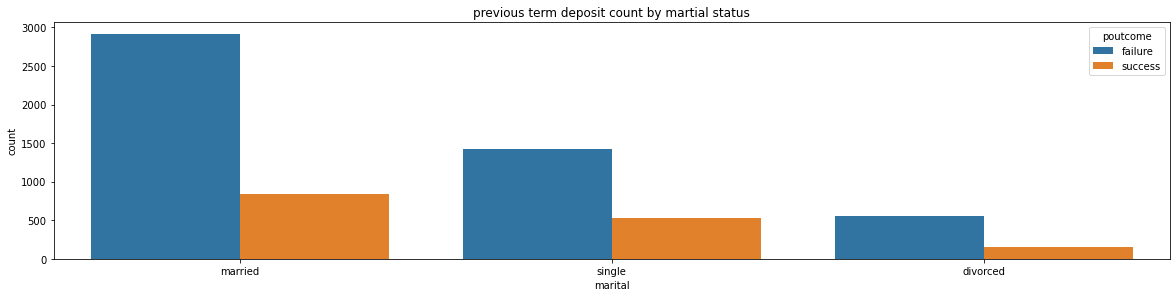

In [47]:
#previous campaign w/o unknown and other
plt.figure(figsize=(20,20))
plt.subplot(4,1,2)
sns.countplot(x='marital',data=bank_df[(bank_df['poutcome']!='unknown')&(bank_df['poutcome']!='other')],hue='poutcome')
plt.title('previous term deposit count by martial status')

#df that only represents marital status an poutcome
mar_dep_df2=bank_df[['marital','poutcome']]

#total count of the unique maritial grouped by yes and no deposit terms
print(mar_dep_df2.groupby('poutcome')['marital'].value_counts(sort=False))
print('-'*20)

#count only those rows that dont include poutcome equal to unknown and other
mar_dep_df2=mar_dep_df2[(mar_dep_df2['poutcome']!='unknown')&(mar_dep_df2['poutcome']!='other')]
count2=mar_dep_df2['marital'].value_counts(sort=False)
print(count2)
print('-'*20)


#combine function for poutcome w/o unknowns and others
#function that calcuates the proportion of yes and no term deposits for a certain column 
def prop(Full_count,df,group_column,status_column):
    x=df[df[status_column]=='success'][group_column].value_counts(sort=False)
    y=df[df[status_column]=='failure'][group_column].value_counts(sort=False)
    print('Yes proportion for',group_column,'category poutcome w/o unknowns')
    print(x/Full_count)
    print('---'*20)
    print('No proportion for',group_column,'category poutcome w/o unknowns')
    print(y/Full_count)
prop(count2,mar_dep_df2,'marital','poutcome')

   marital  balance
0  married     2143
1   single       29
2  married        2
3  married     1506
4   single        1


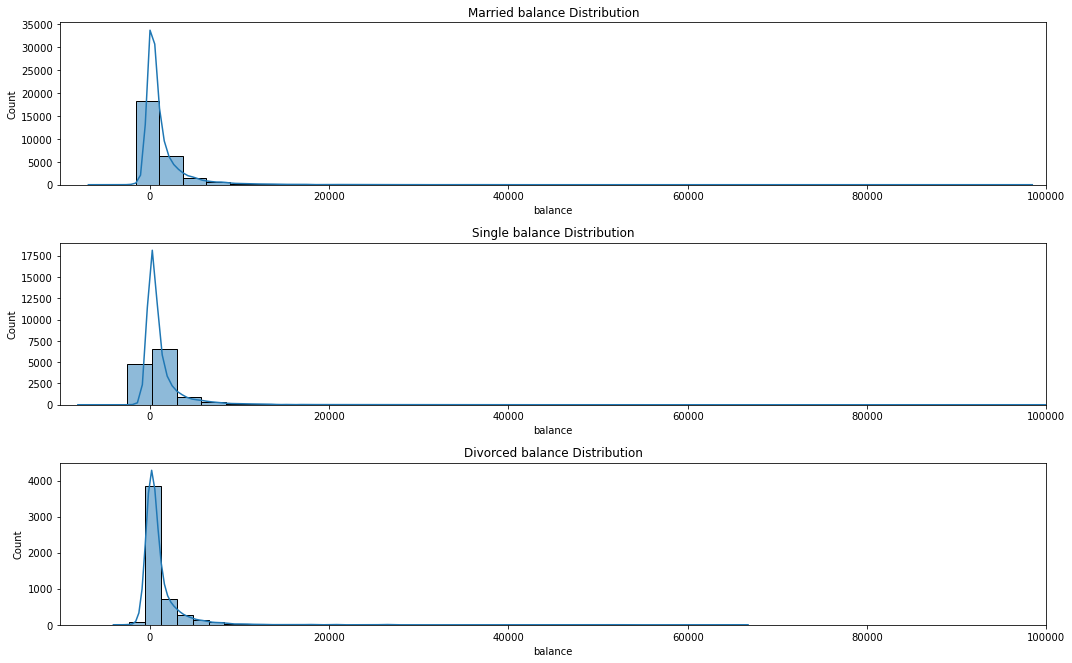

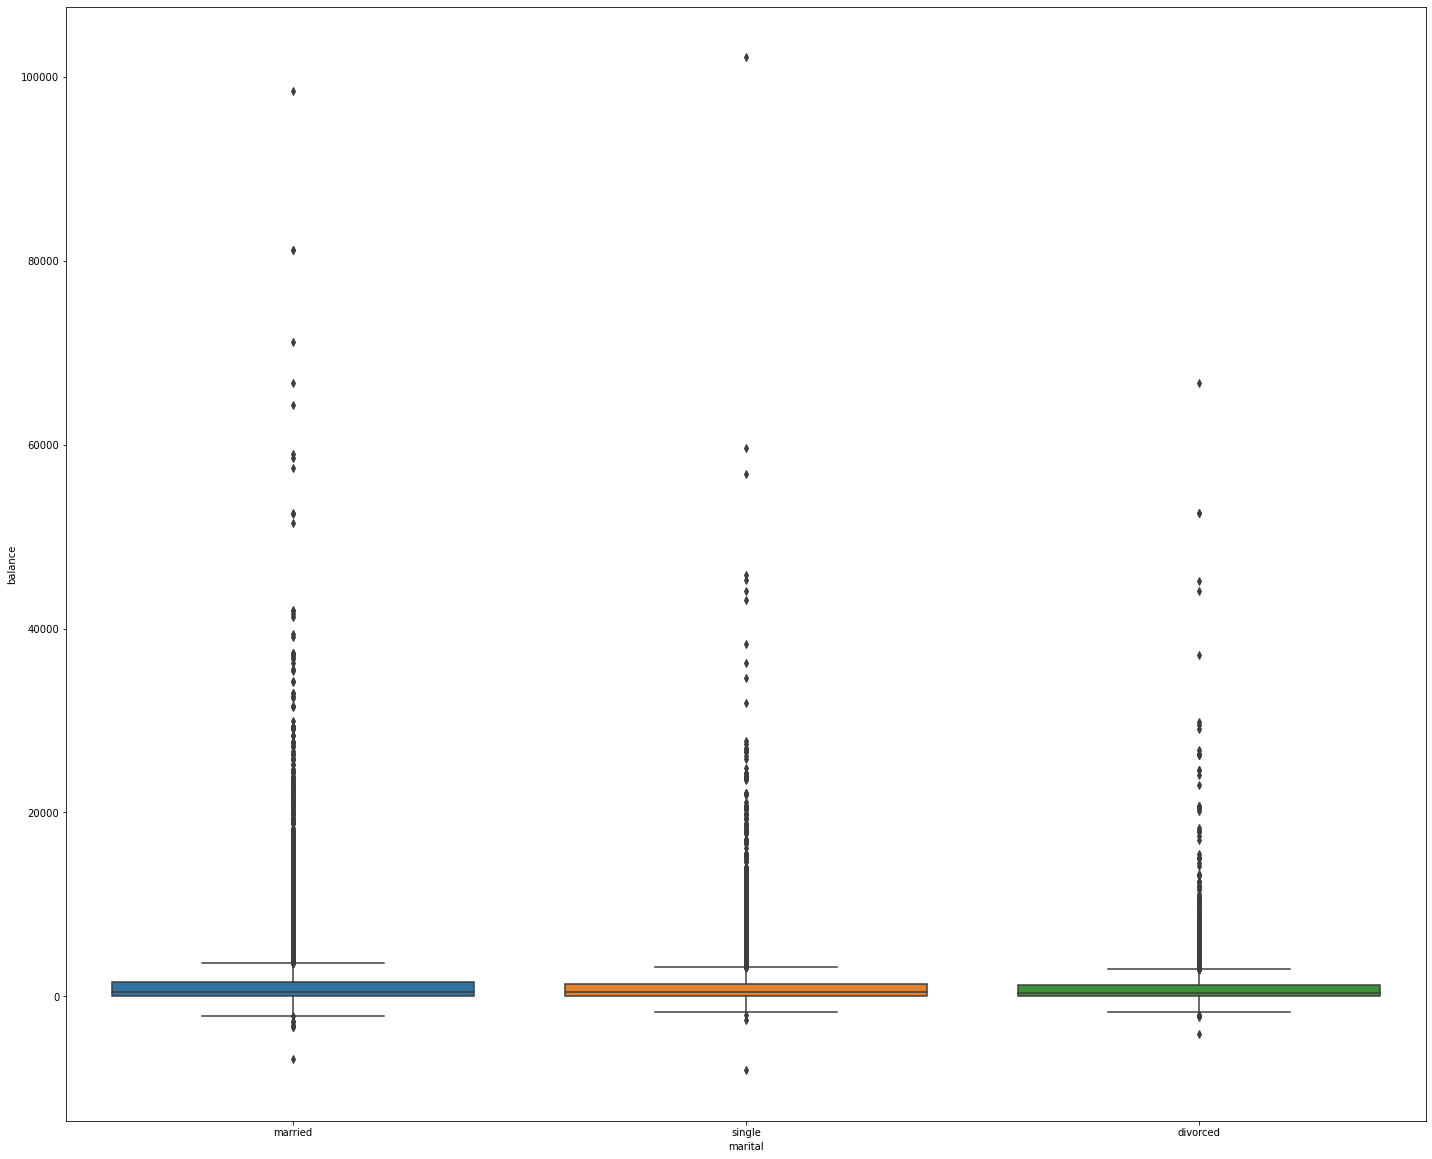

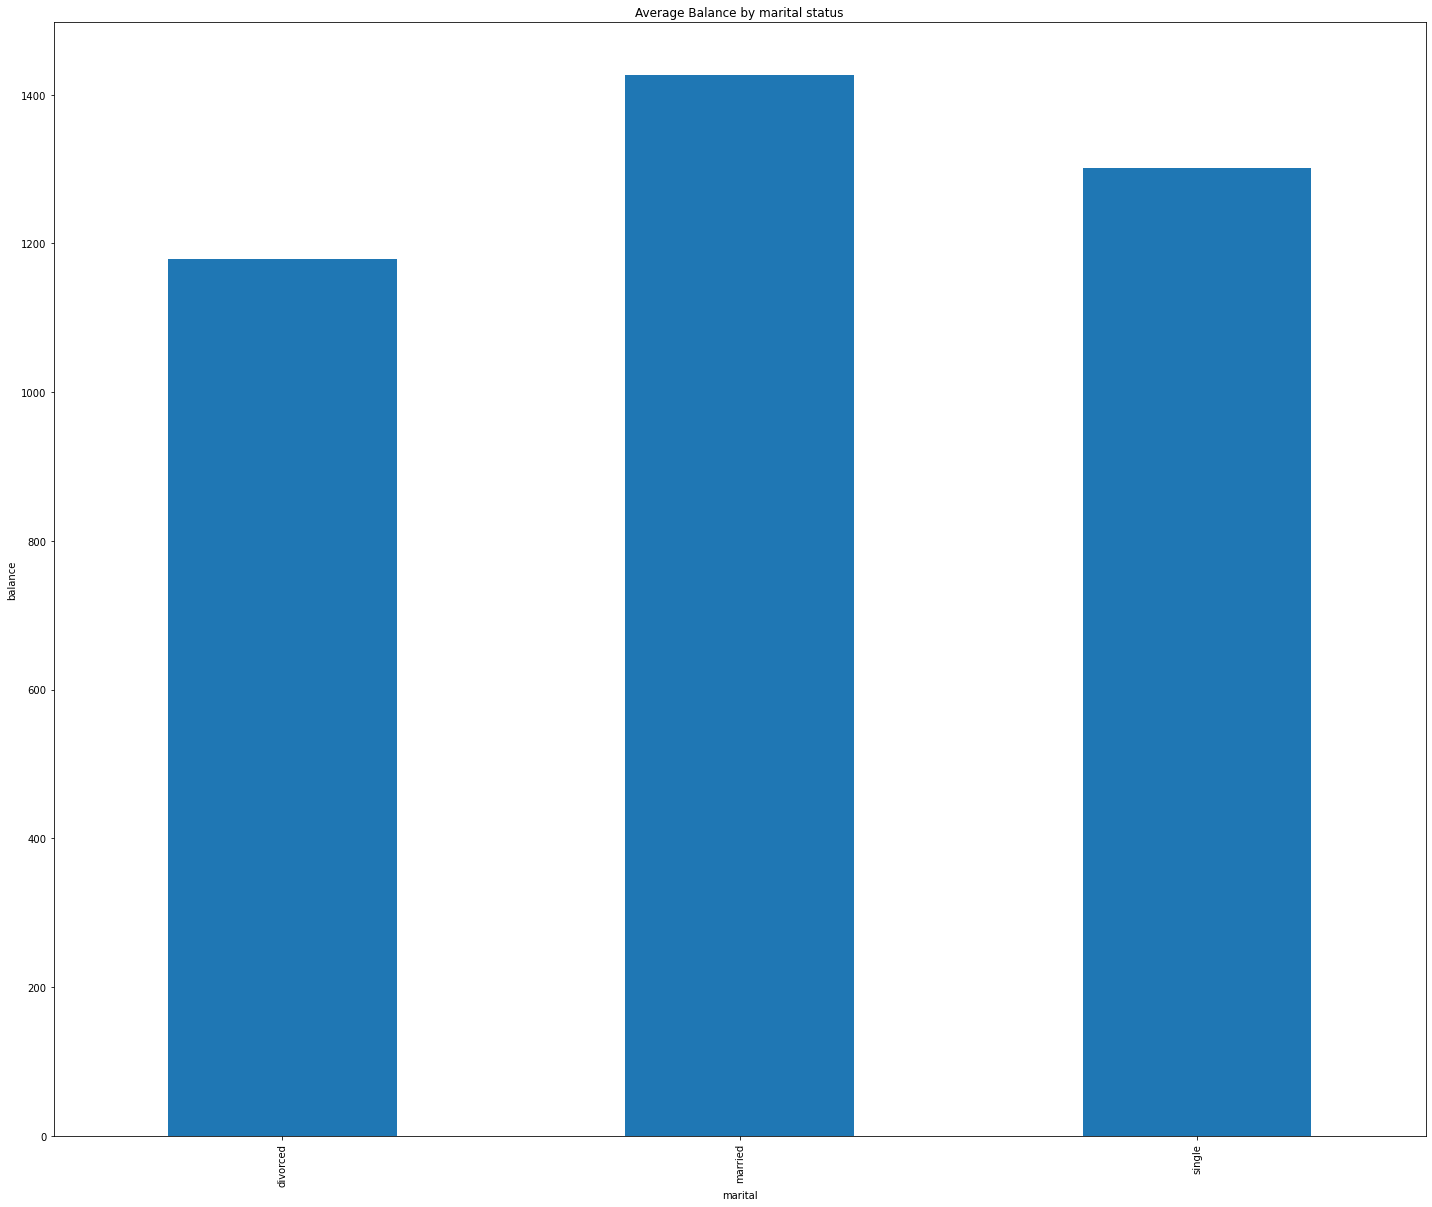

In [30]:
import matplotlib.pyplot as plt
from importlib import reload
plt=reload(plt)
#looking at the balance between the 3 types of marital status
marital_bal_df=bank_df[['marital','balance']]
print(marital_bal_df.head())

married_df=marital_bal_df[marital_bal_df['marital']=='married']
single_df=marital_bal_df[marital_bal_df['marital']=='single']
divorced_df=marital_bal_df[marital_bal_df['marital']=='divorced']

plt.figure(figsize=(15,15))
plt.subplot(5,1,1)
sns.histplot(data=married_df,x='balance',kde=True,bins=40)
plt.title('Married balance Distribution')
plt.xlim([-10000,100000])
plt.tight_layout()
plt.subplot(5,1,2)
sns.histplot(data=single_df,x='balance',kde=True,bins=40)
plt.title('Single balance Distribution')
plt.xlim([-10000,100000])
plt.tight_layout()
plt.subplot(5,1,3)
sns.histplot(data=divorced_df,x='balance',kde=True,bins=40)
plt.title('Divorced balance Distribution')
plt.xlim([-10000,100000])
plt.tight_layout()

#box plot
plt.figure(figsize=(20,80))
plt.subplot(5,1,4)
sns.boxplot(x='marital',y='balance',data=bank_df)
plt.tight_layout()

plt.figure(figsize=(20,80))
plt.subplot(5,1,5)
mean_bal_by_mar=bank_df.groupby('marital')['balance'].mean()
mean_bal_by_mar.plot(kind='bar')
plt.title('Average Balance by marital status')
plt.ylabel('balance')
plt.tight_layout()
plt.show()

# 3.3.7 Balance and loans, housing 

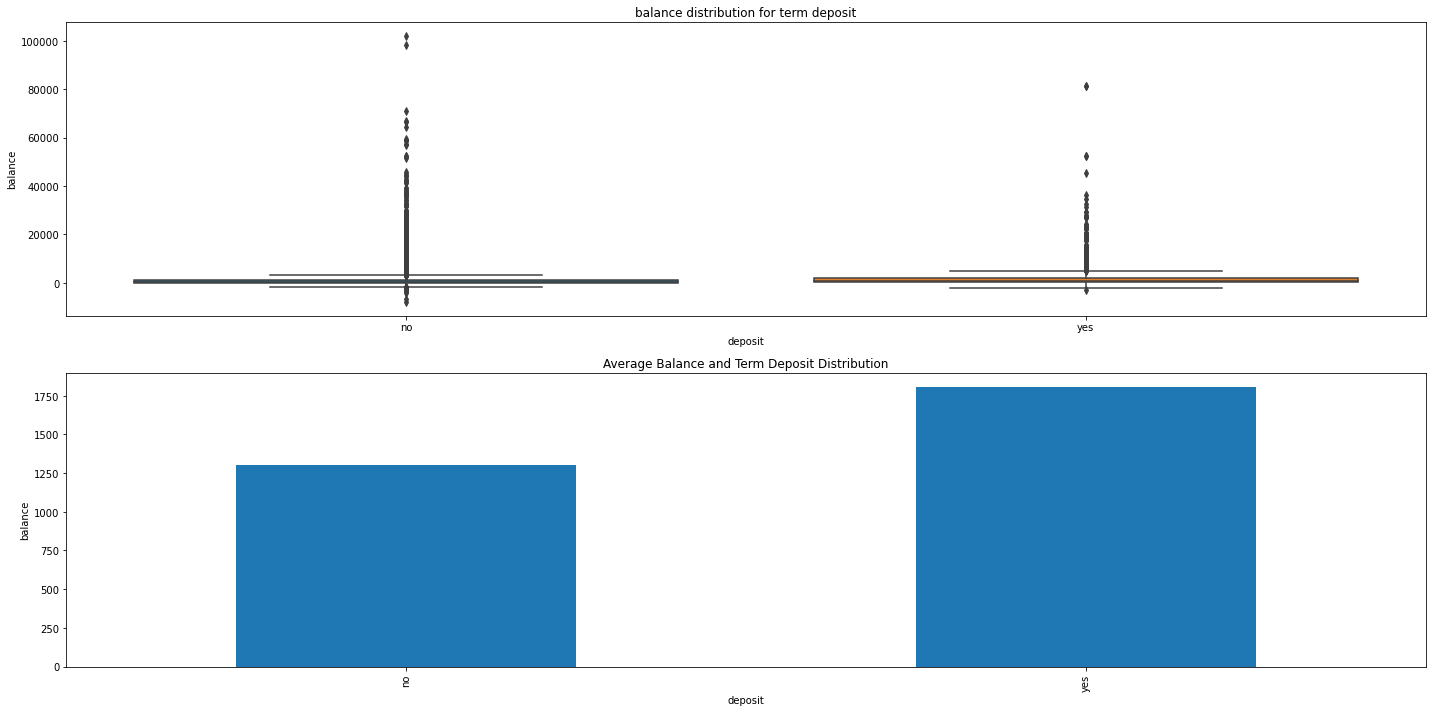

In [18]:
#balance of those who have and dont have a term deposit 
plt.figure(figsize=(20,10))
plt.subplot(211)
sns.boxplot(x='deposit',y='balance',data=bank_df)
plt.title('balance distribution for term deposit')
plt.subplot(212)

mean_bal=bank_df.groupby('deposit')['balance'].mean()
mean_bal.plot(kind='bar')
plt.title('Average Balance and Term Deposit Distribution')
plt.ylabel('balance')
plt.tight_layout()
plt.show()





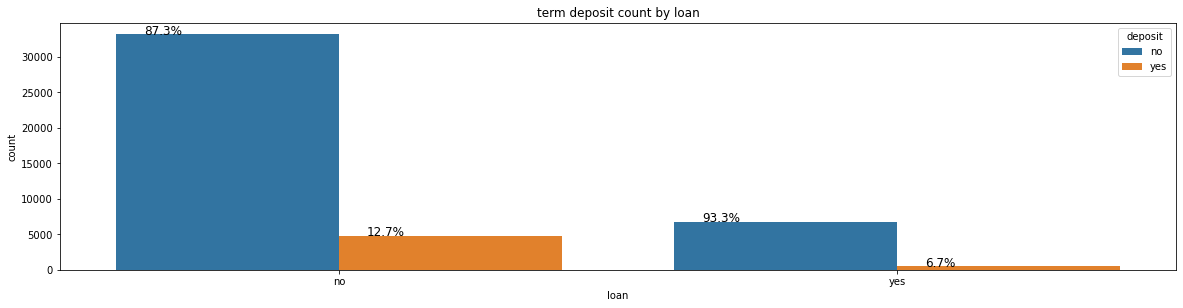

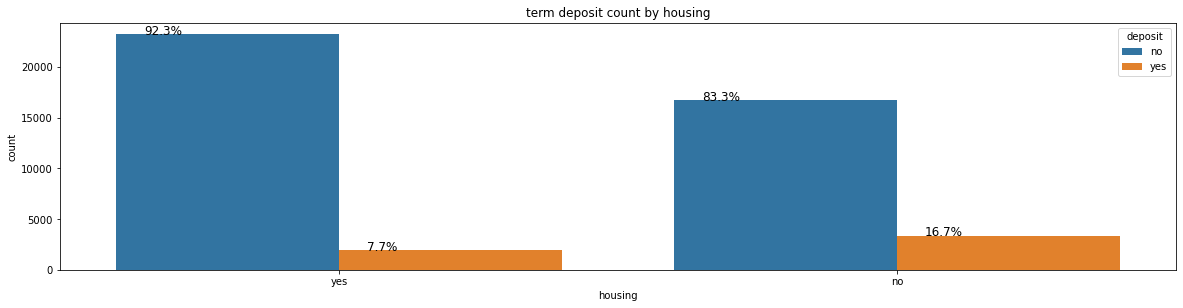

In [50]:
#loan count distrbution of deposits
def with_hue(plot, feature, Number_of_categories, hue_categories):
    a = [p.get_height() for p in plot.patches]
    patch = [p for p in plot.patches]
    for i in range(Number_of_categories):
        total = feature.value_counts().values[i]
        for j in range(hue_categories):
            percentage = '{:.1f}%'.format(100 * a[(j*Number_of_categories + i)]/total)
            x = patch[(j*Number_of_categories + i)].get_x() + patch[(j*Number_of_categories + i)].get_width() / 2 - 0.15
            y = patch[(j*Number_of_categories + i)].get_y() + patch[(j*Number_of_categories + i)].get_height() 
            ax.annotate(percentage, (x, y), size = 12)
    plt.show()
    
plt.figure(figsize=(20,10))
plt.subplot(211)
ax=sns.countplot(x='loan',data= bank_df,hue = 'deposit')
plt.title('term deposit count by loan')
with_hue(ax,bank_df['loan'],2,2)


plt.figure(figsize=(20,10))
plt.subplot(212)
ax=sns.countplot(x='housing',data= bank_df,hue = 'deposit')
plt.title('term deposit count by housing')
with_hue(ax,bank_df['housing'],2,2)


Text(0.5, 1.0, 'balance distribution by having a housing loan')

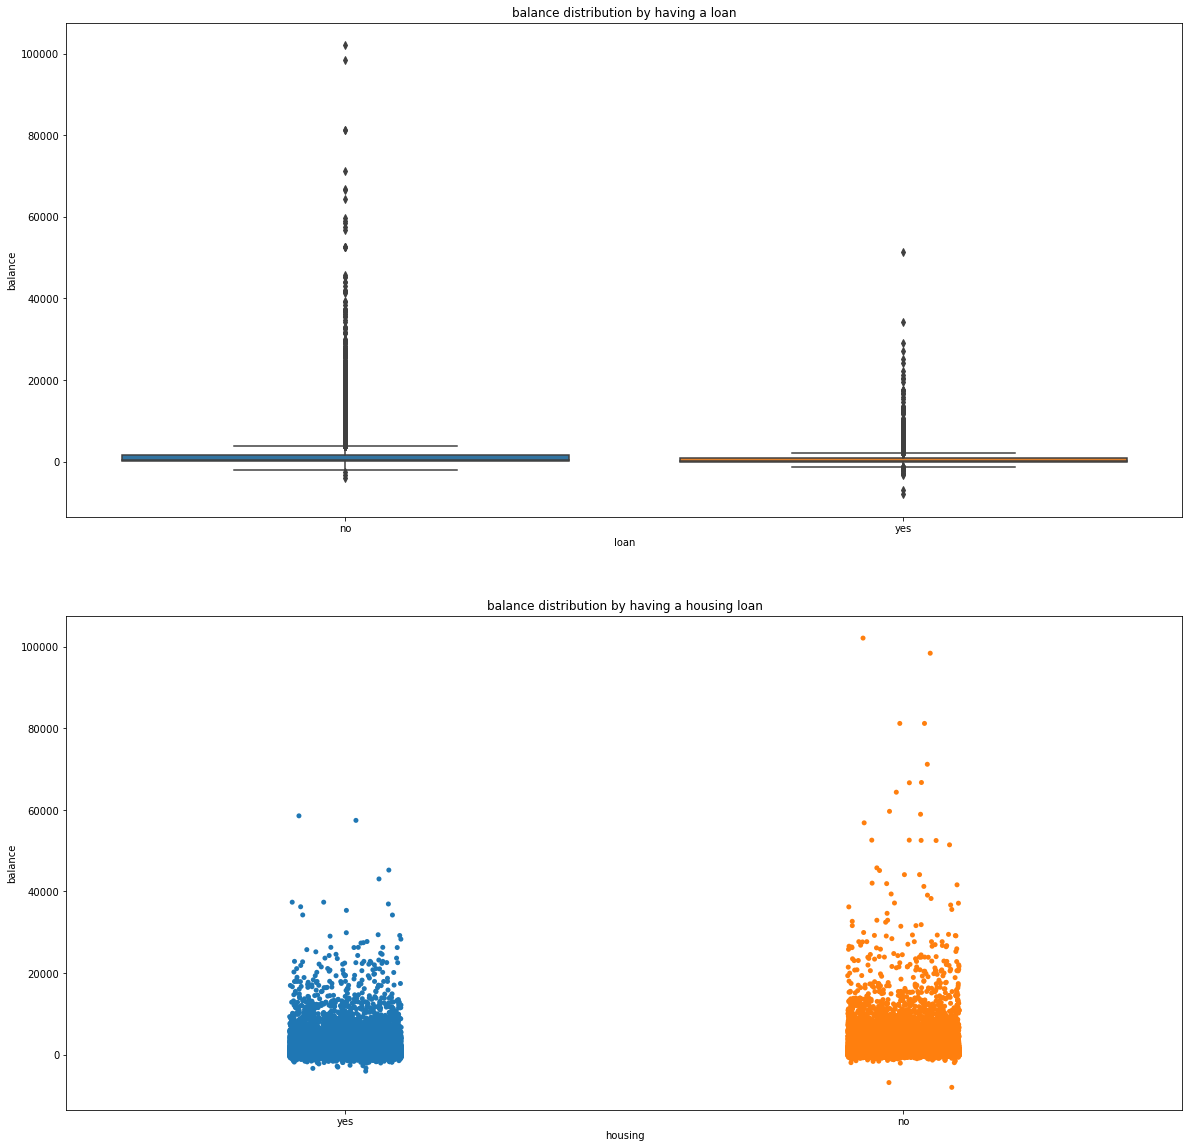

In [51]:
#show balance of those who have and dont have any type of loan
plt.figure(figsize=(20,20))
plt.subplot(211)
sns.boxplot(x='loan',y='balance',data=bank_df)
plt.title('balance distribution by having a loan')
plt.subplot(212)
sns.stripplot(x='housing',y='balance',data=bank_df)
plt.title('balance distribution by having a housing loan')

# 3.3.8 Education

   education deposit
0   tertiary      no
1  secondary      no
2  secondary      no
3    unknown      no
4    unknown      no
--------------------
deposit  education
no       primary       6260
         secondary    20752
         tertiary     11305
         unknown       1605
yes      primary        591
         secondary     2450
         tertiary      1996
         unknown        252
Name: education, dtype: int64
--------------------
total Count of education status categories
primary       6851
unknown       1857
secondary    23202
tertiary     13301
Name: education, dtype: int64
--------------------
Yes proportion for education category
primary      0.086265
secondary    0.105594
tertiary     0.150064
unknown      0.135703
Name: education, dtype: float64
------------------------------------------------------------
No proportion for education category
primary      0.913735
unknown      0.864297
secondary    0.894406
tertiary     0.849936
Name: education, dtype: float64


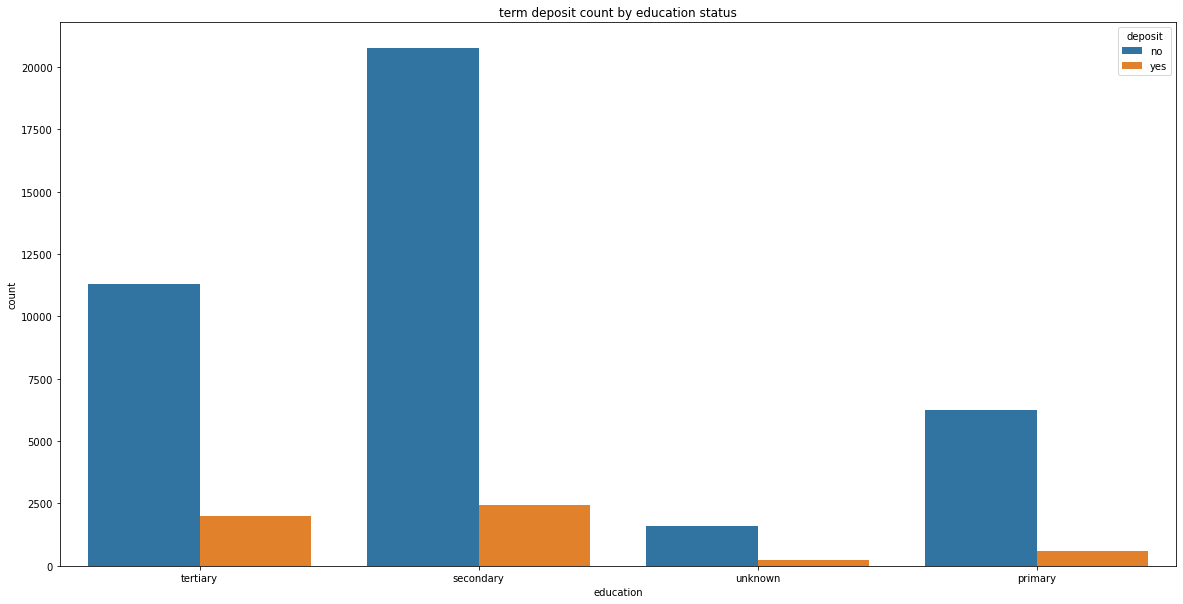

In [31]:
#education status
#education status count distrbution of deposits

    

plt.figure(figsize=(20,10))
ax=sns.countplot(x='education',data=bank_df,hue='deposit')
plt.ylabel='Count'
plt.title('term deposit count by education status')


#df that represents only education  and deposit columns
ed_dep_df=bank_df[['education','deposit']]
print(ed_dep_df.head())
print('-'*20)

#total count of the unique education  status grouped by yes and no deposit terms
print(ed_dep_df.groupby('deposit')['education'].value_counts(sort=False))
print('-'*20)

#total count of unique education  status in the column
print("total Count of education status categories")
count= ed_dep_df['education'].value_counts(sort=False)
print(count)
print('-'*20)


#combine function
#function that calcuates the proportion of yes and no term deposits for a certain column 
def prop(Full_count,df,group_column,status_column):
    x=df[df[status_column]=='yes'][group_column].value_counts(sort=False)
    y=df[df[status_column]=='no'][group_column].value_counts(sort=False)
    print('Yes proportion for',group_column,'category')
    print(x/Full_count)
    print('---'*20)
    print('No proportion for',group_column,'category')
    print(y/Full_count)
prop(count,ed_dep_df,'education','deposit')

poutcome  education
failure   primary        643
          secondary     2589
          tertiary      1492
          unknown        177
other     primary        244
          secondary      987
          tertiary       544
          unknown         65
success   primary        133
          secondary      675
          tertiary       622
          unknown         81
unknown   primary       5831
          secondary    18951
          tertiary     10643
          unknown       1534
Name: education, dtype: int64
--------------------
tertiary     2114
primary       776
secondary    3264
unknown       258
Name: education, dtype: int64
--------------------
Yes proportion for education category poutcome w/o unknowns
tertiary     0.294229
primary      0.171392
secondary    0.206801
unknown      0.313953
Name: education, dtype: float64
------------------------------------------------------------
No proportion for education category poutcome w/o unknowns
tertiary     0.705771
primary      0.82860

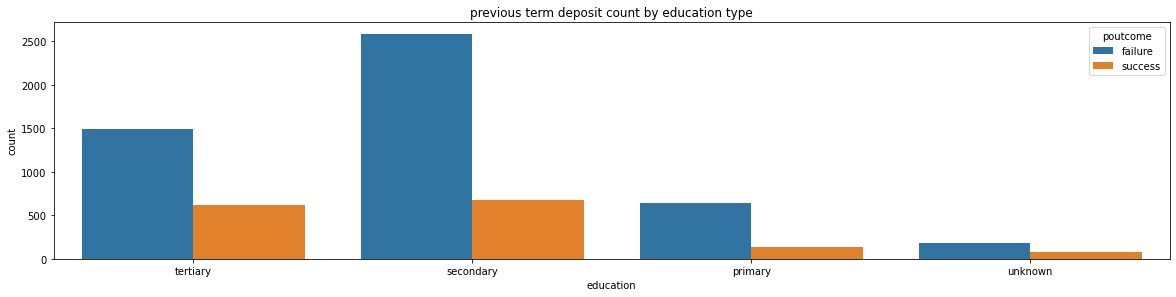

In [53]:
#previous campaign w/o unkown and other
plt.figure(figsize=(20,20))
plt.subplot(4,1,2)
sns.countplot(x='education',data=bank_df[(bank_df['poutcome']!='unknown')&(bank_df['poutcome']!='other')],hue='poutcome')
plt.title('previous term deposit count by education type')

#df that only represents edcuation an poutcome
ed_dep_df2=bank_df[['education','poutcome']]

#total count of the unique edcuation groubed by yes and no deposit terms
print(ed_dep_df2.groupby('poutcome')['education'].value_counts(sort=False))
print('-'*20)

#count only those rows that dont include poutcome equal to unknown and other
ed_dep_df2=ed_dep_df2[(ed_dep_df2['poutcome']!='unknown')&(ed_dep_df2['poutcome']!='other')]
count2=ed_dep_df2['education'].value_counts(sort=False)
print(count2)
print('-'*20)


#combine function for poutcome w/o unknowns and others
#function that calcuates the proportion of yes and no term deposits for a certain column 
def prop(Full_count,df,group_column,status_column):
    x=df[df[status_column]=='success'][group_column].value_counts(sort=False)
    y=df[df[status_column]=='failure'][group_column].value_counts(sort=False)
    print('Yes proportion for',group_column,'category poutcome w/o unknowns')
    print(x/Full_count)
    print('---'*20)
    print('No proportion for',group_column,'category poutcome w/o unknowns')
    print(y/Full_count)
prop(count2,ed_dep_df2,'education','poutcome')

Text(0.5, 1.0, 'balance distribution by education type')

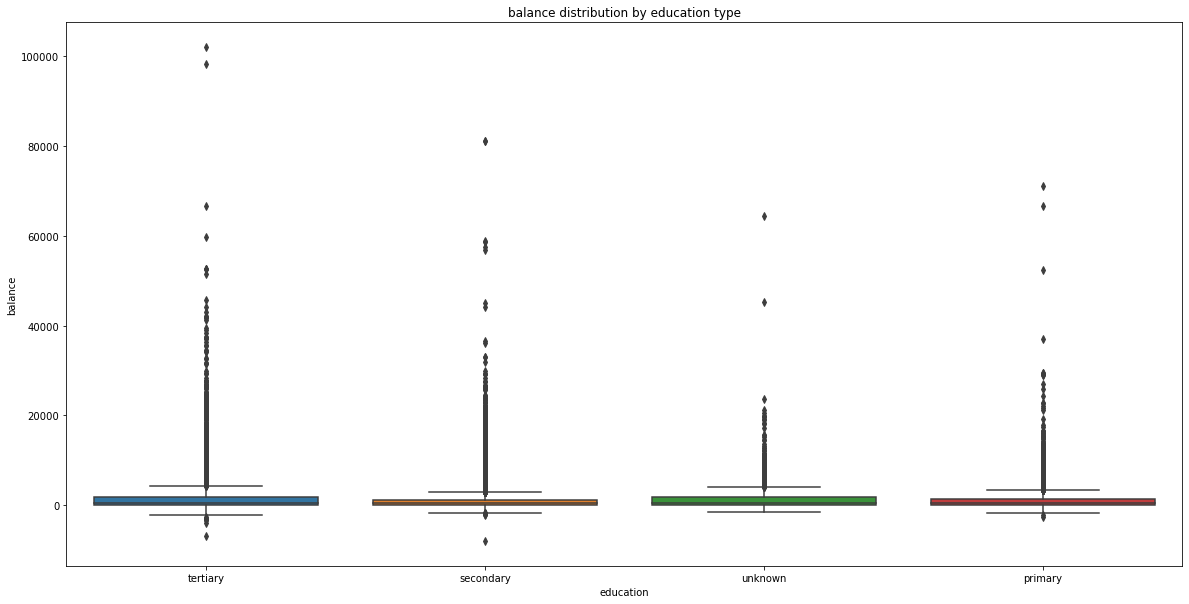

In [54]:
#balance distribution for each education category
plt.figure(figsize=(20,10))
sns.boxplot(x='education',y='balance',data=bank_df)
plt.title('balance distribution by education type')

# 3.3.9 Month

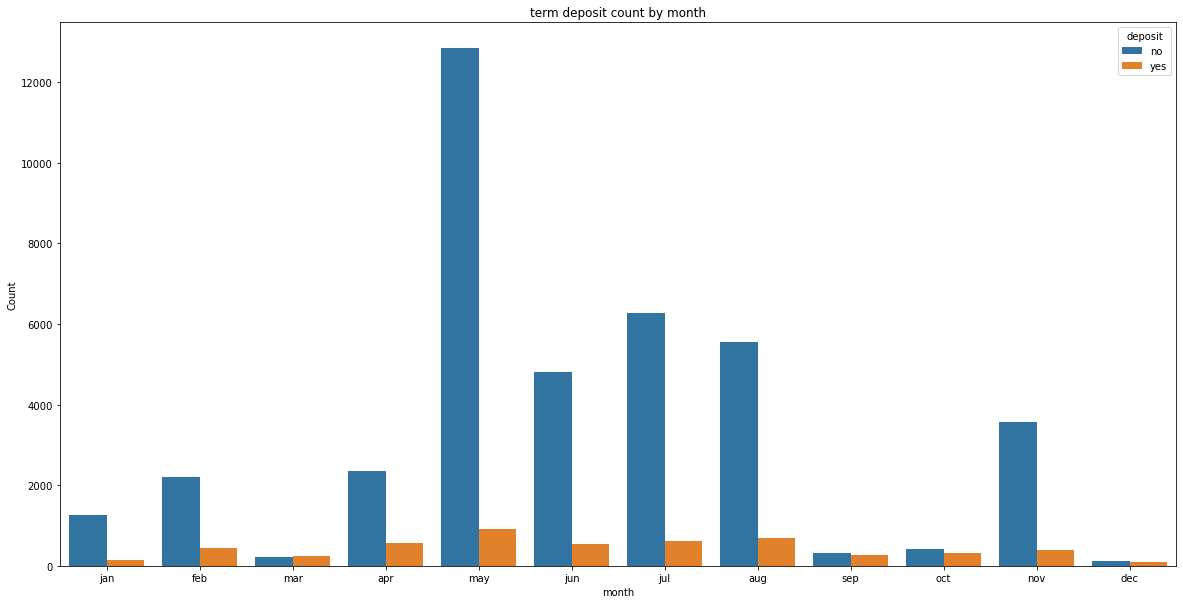

  month deposit
0   may      no
1   may      no
2   may      no
3   may      no
4   may      no
--------------------
deposit  month
no       apr       2355
         aug       5559
         dec        114
         feb       2208
         jan       1261
         jul       6268
         jun       4795
         mar        229
         may      12841
         nov       3567
         oct        415
         sep        310
yes      apr        577
         aug        688
         dec        100
         feb        441
         jan        142
         jul        627
         jun        546
         mar        248
         may        925
         nov        403
         oct        323
         sep        269
Name: month, dtype: int64
--------------------
total Count of months categories
sep      579
oct      738
may    13766
jan     1403
apr     2932
aug     6247
feb     2649
dec      214
nov     3970
jul     6895
jun     5341
mar      477
Name: month, dtype: int64
--------------------
Yes propo

In [55]:
#term deposit visual by month
import matplotlib.pyplot as plt
from importlib import reload
plt=reload(plt)
#month count distrbution of deposits
plt.figure(figsize=(20,10))
sns.countplot(x='month',data=bank_df,hue='deposit',order=('jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec'))
plt.ylabel('Count')
plt.title('term deposit count by month')
plt.show()

#df that represents months and deposit columns
month_dep_df=bank_df[['month','deposit']]
print(month_dep_df.head())
print('-'*20)

#total count by month in terms of yes and no values for term deposits 
print(month_dep_df.groupby('deposit')['month'].value_counts(sort=False))
print('-'*20)

#total count of deposits by months 
print("total Count of months categories")
count= month_dep_df['month'].value_counts(sort=False)
print(count)
print('-'*20)


#combine function
#function that calcuates the proportion of yes and no term deposits for a certain column 
def prop(Full_count,df,group_column,status_column):
    x=df[df[status_column]=='yes'][group_column].value_counts(sort=False)
    y=df[df[status_column]=='no'][group_column].value_counts(sort=False)
    print('Yes proportion for',group_column,'category')
    print(x/Full_count)
    print('---'*20)
    print('No proportion for',group_column,'category')
    print(y/Full_count)
prop(count,month_dep_df,'month','deposit')

# 3.3.10 Days

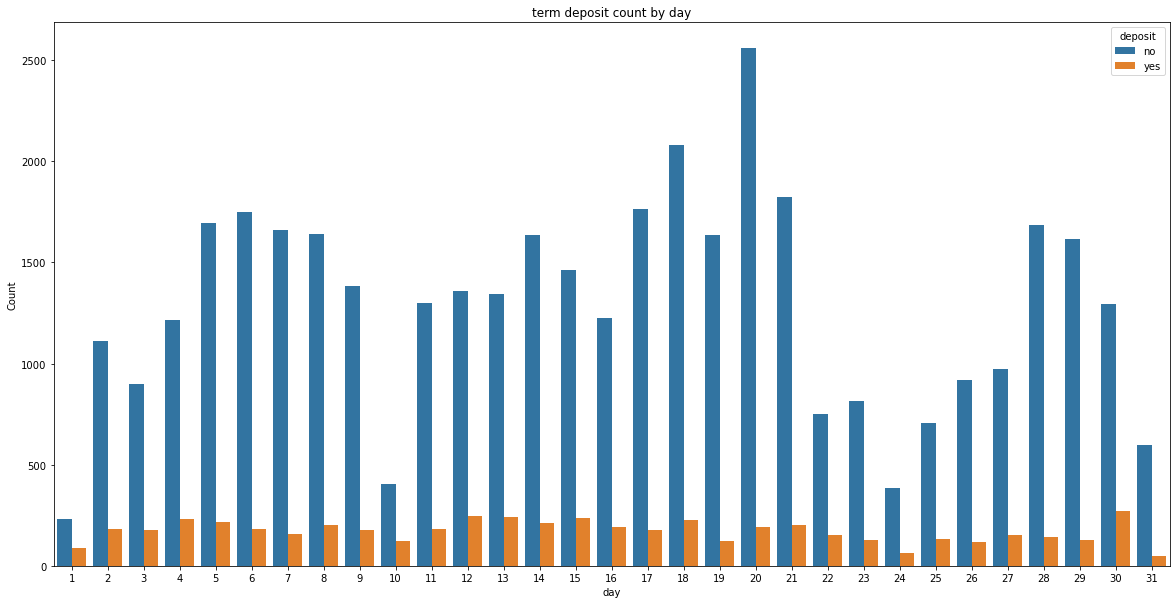

In [56]:

#Day count distrbution of deposits
plt.figure(figsize=(20,10))
sns.countplot(x='day',data=bank_df,hue='deposit')
plt.ylabel('Count')
plt.title('term deposit count by day')
plt.show()


# 3.3.11 Poutcome

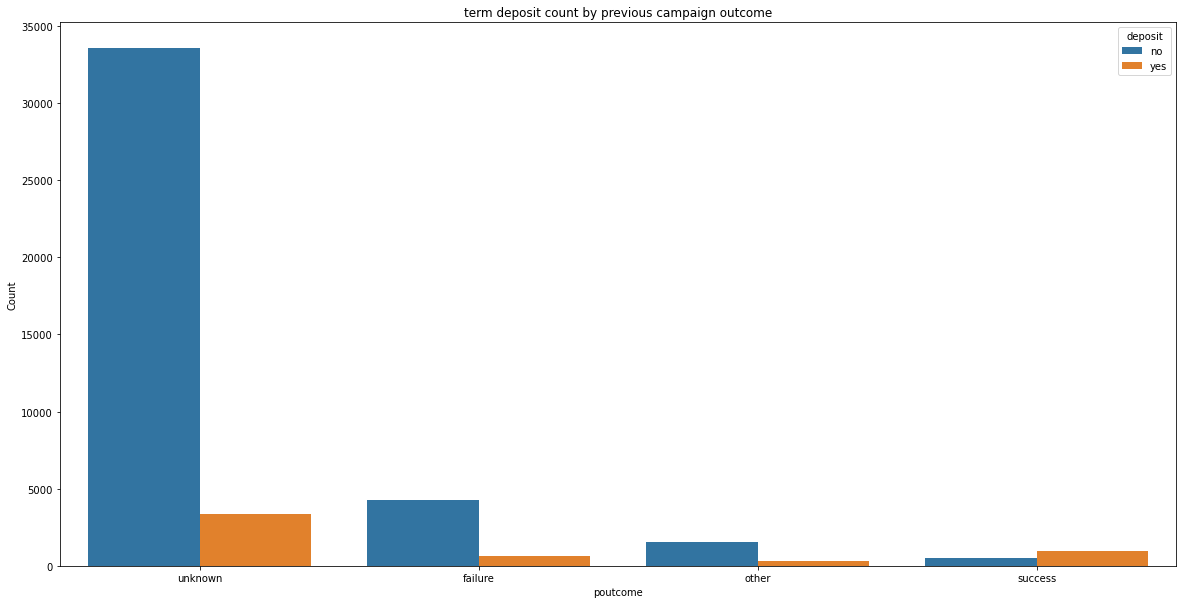

In [57]:
#poutcome count distrbution of deposits
plt.figure(figsize=(20,10))
sns.countplot(x='poutcome',data=bank_df,hue='deposit')
plt.ylabel('Count')
plt.title('term deposit count by previous campaign outcome')
plt.show()

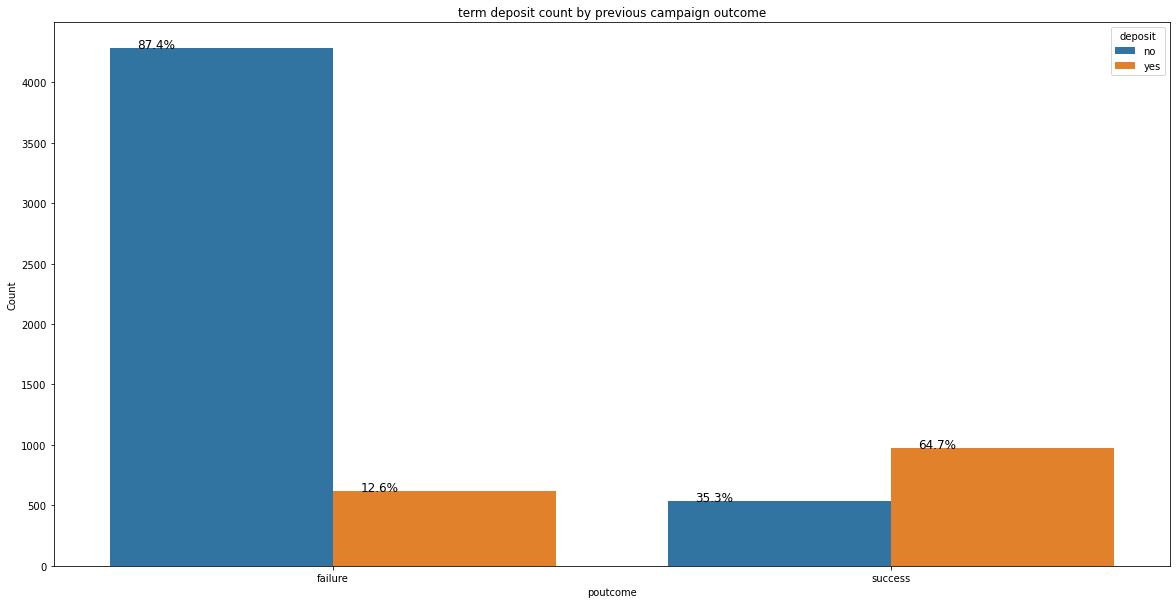

In [58]:
#poutcome count distrbution of deposits w/o unknowns and others
def with_hue(plot, feature, Number_of_categories, hue_categories):
    a = [p.get_height() for p in plot.patches]
    patch = [p for p in plot.patches]
    for i in range(Number_of_categories):
        total = feature.value_counts().values[i]
        for j in range(hue_categories):
            percentage = '{:.1f}%'.format(100 * a[(j*Number_of_categories + i)]/total)
            x = patch[(j*Number_of_categories + i)].get_x() + patch[(j*Number_of_categories + i)].get_width() / 2 - 0.15
            y = patch[(j*Number_of_categories + i)].get_y() + patch[(j*Number_of_categories + i)].get_height() 
            ax.annotate(percentage, (x, y), size = 12)
    plt.show()
    
bank_df2=bank_df[(bank_df['poutcome']!='unknown')&(bank_df['poutcome']!='other')]




plt.figure(figsize=(20,10))
ax=sns.countplot(x='poutcome',data=bank_df[(bank_df['poutcome']!='unknown')&(bank_df['poutcome']!='other')],hue='deposit')
plt.ylabel('Count')
plt.title('term deposit count by previous campaign outcome')
with_hue(ax,bank_df2['poutcome'],2,2)


poutcome viewed with previous(calls made during the previous campaign)

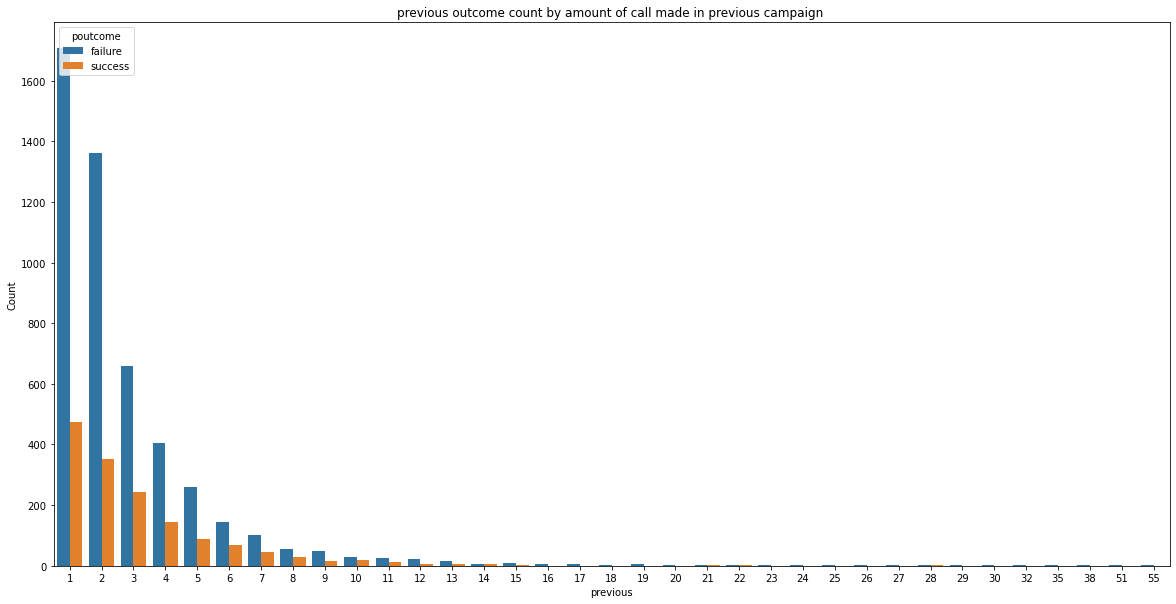

poutcome  previous
failure   1            1707
          2            1362
          3             660
          4             405
          5             261
                      ...  
unknown   0           36954
          1               1
          2               2
          5               1
          7               1
Name: previous, Length: 92, dtype: int64
--------------------
4      549
8       83
12      27
16       7
20       3
24       1
28       2
32       1
1     2180
5      351
9       65
13      22
17       6
21       2
25       3
29       2
2     1714
6      213
10      48
14      12
18       1
22       3
26       1
30       2
38       2
3      904
7      145
11      38
15      10
19       7
23       3
27       2
35       1
51       1
55       1
Name: previous, dtype: int64
--------------------
Yes proportion for previous category poutcome w/o unknowns
1     0.216972
2     0.205368
3     0.269912
4     0.262295
5     0.256410
6     0.314554
7     0.303448
8     0.3493

In [60]:
#previous outcome(poutcome) with the amount a calls made(previous)
import matplotlib.pyplot as plt
from importlib import reload
plt=reload(plt)

plt.figure(figsize=(20,10))
sns.countplot(x='previous',data= bank_df[(bank_df['poutcome']!='unknown')&(bank_df['poutcome']!='other')],hue = 'poutcome')
plt.ylabel('Count')
plt.title('previous outcome count by amount of call made in previous campaign ')
plt.show()


#df that only represents previous and poutcome
pre_dep_df=bank_df[['previous','poutcome']]

#total count of the unique previous groubpd by yes and no poutcome
print(pre_dep_df.groupby('poutcome')['previous'].value_counts(sort=False))
print('-'*20)

#count only those rows that dont include poutcome equal to unknown and other
pre_dep_df= pre_dep_df[(pre_dep_df['poutcome']!='unknown')&(pre_dep_df['poutcome']!='other')]
count=pre_dep_df['previous'].value_counts(sort=False)
print(count)
print('-'*20)


#combine function for poutcome w/o unknowns and others
#function that calcuates the proportion of yes and no term deposits for a certain column 
def prop(Full_count,df,group_column,status_column):
    x=df[df[status_column]=='success'][group_column].value_counts(sort=False)
    y=df[df[status_column]=='failure'][group_column].value_counts(sort=False)
    print('Yes proportion for',group_column,'category poutcome w/o unknowns')
    print(x/Full_count)
    print('---'*20)
    print('No proportion for',group_column,'category poutcome w/o unknowns')
    print(y/Full_count)
prop(count,pre_dep_df,'previous','poutcome')

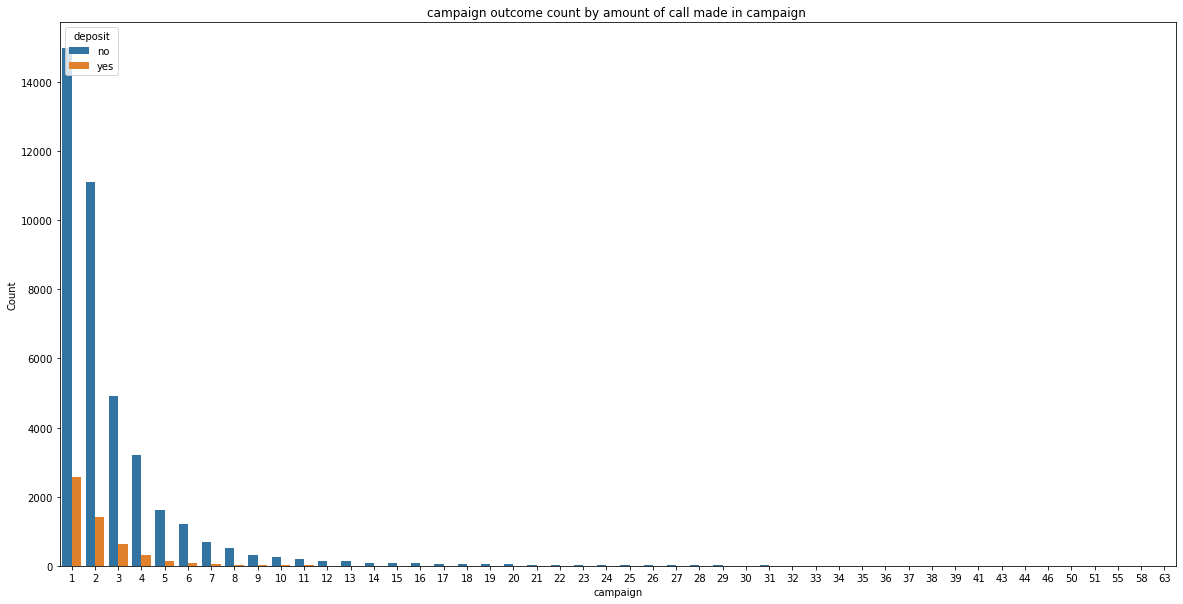

deposit  campaign
no       1           14983
         2           11104
         3            4903
         4            3205
         5            1625
                     ...  
yes      20              1
         21              1
         24              1
         29              1
         32              1
Name: campaign, Length: 70, dtype: int64
--------------------
total Count of campaign categories
32        9
1     17544
33        6
2     12505
34        5
3      5521
35        4
4      3522
36        4
5      1764
37        2
6      1291
38        3
7       735
39        1
8       540
9       327
41        2
10      266
11      201
43        3
12      155
44        1
13      133
14       93
46        1
15       84
16       79
17       69
18       51
50        2
19       44
51        1
20       43
21       35
22       23
23       22
55        1
24       20
25       22
26       13
58        1
27       10
28       16
29       16
30        8
31       12
63        1
Name: campai

In [61]:
#now looking at current capaign(number of calls made)



plt.figure(figsize=(20,10))
sns.countplot(x='campaign',data= bank_df,hue = 'deposit')
plt.ylabel('Count')
plt.title('campaign outcome count by amount of call made in campaign ')
plt.show()

#df that only represents campaign and deposit
camp_dep_df=bank_df[['campaign','deposit']]

#total count of the unique campaign grouped by yes and no deposit terms
print(camp_dep_df.groupby('deposit')['campaign'].value_counts(sort=False))
print('-'*20)

#total count of deposits by campaign 
print("total Count of campaign categories")
count= camp_dep_df['campaign'].value_counts(sort=False)
print(count)
print('-'*20)


#combine function
#function that calcuates the proportion of yes and no term deposits for a certain column 
def prop(Full_count,df,group_column,status_column):
    x=df[df[status_column]=='yes'][group_column].value_counts(sort=False)
    y=df[df[status_column]=='no'][group_column].value_counts(sort=False)
    print('Yes proportion for',group_column,'category')
    print(x/Full_count)
    print('---'*20)
    print('No proportion for',group_column,'category')
    print(y/Full_count)
prop(count,camp_dep_df,'campaign','deposit')

print(bank_df['campaign'].sum(),'total calls')

# 3.3.12 Duration


deposit            no   yes
duration status            
above avearge    75.0  25.0
below avearge    95.0   5.0


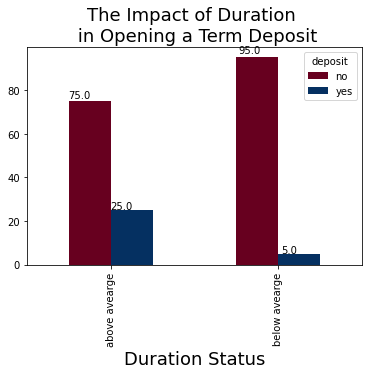

In [208]:

pct_term = pd.crosstab(bank_df['duration status'], bank_df['deposit']).apply(lambda r: round(r/r.sum(), 2) * 100, axis=1)
print(pct.head())

ax = pct_term.plot(kind='bar', stacked=False, cmap='RdBu')
plt.title("The Impact of Duration \n in Opening a Term Deposit", fontsize=18)
plt.xlabel("Duration Status", fontsize=18);


for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.02, p.get_height() * 1.02))
    

plt.show()

In [19]:
avg_duration=bank_df['duration'].mean()
print(avg_duration)
med_duration=bank_df['duration'].median()
print(med_duration)
max_duration=bank_df['duration'].max()
print(max_duration)
print(bank_df['duration'].sum()/60,'total min')

258.1630797814691
180.0
4918
194530.18333333332 total min


# 4) Insights



Category descriptions to keep in mind

housing = has housing loan (yes or no)

loan = has personal loan (yes or no)

duration = last contact duration in seconds and is only recorded after the call is made

campaign = number of contacts made during the current marketing campaign

pdays = number of contact made during the last marketing campaign

previous = the outcome of the previous campaign

deposit = results of the current campaign


Text(0.5, 0, 'Attributes')

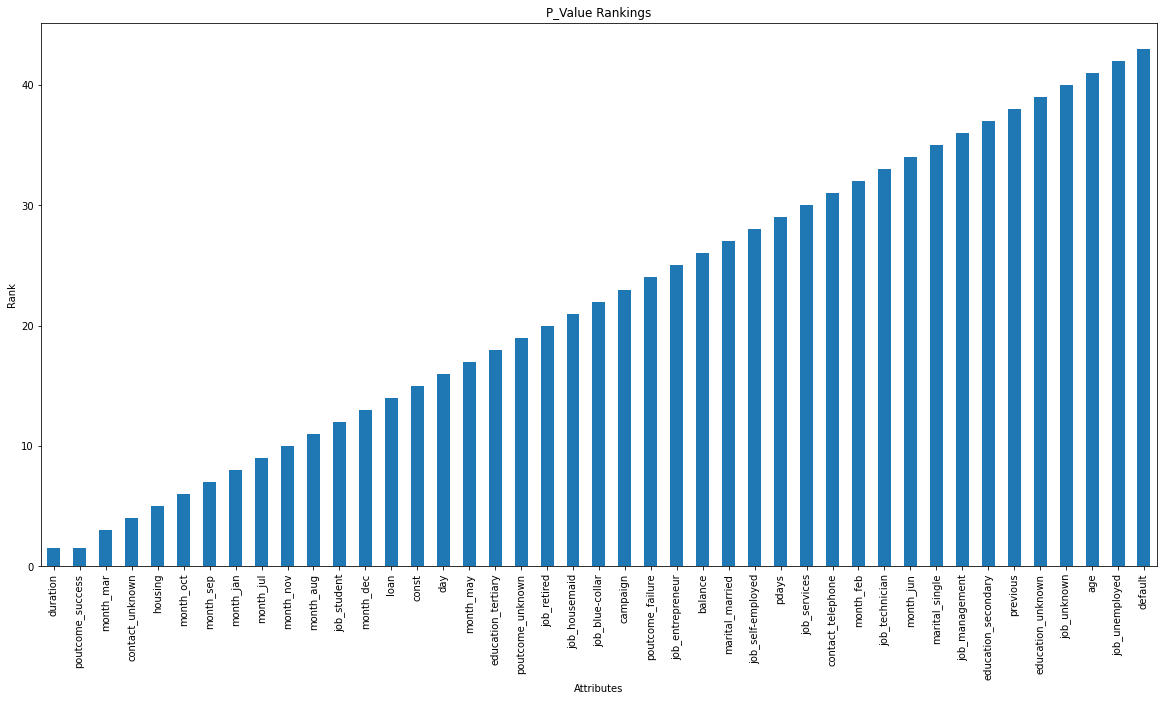

In [12]:
#Regression equation
pval=pd.DataFrame(model.pvalues)
pval=pval.rename(columns={0:'pvalue'})
rank = pval['pvalue'].rank(ascending=True).sort_values(ascending=True)

plt.figure(figsize=(20,10))
rank.plot(kind='bar')
plt.title('P_Value Rankings')
plt.ylabel('Rank')
plt.xlabel('Attributes')

Regression equation

The ranked P-values based on significance produced from the regression equation shown several key indicators that affect the response of customers subscribing to a term deposit, which will aid in formulating a plan to reduce the amount of call center calls being made during the next marketing campaign
The key categories can be split up into several groups to illustrate their significance in impacting term deposit subscribers.
1)	Balance, housing and loans - these 3 categories are related to each other as having any kind of loan will affect your balance thus affecting term subscription success

2)	Poutcome - poutcome success means that this customer subscribed to a term deposit during the previous campaign and is rank second in importance in terms of p-value and should be used as a benchmark indicator 

3)	Campaign (number of contacts made) and duration (length of call-in seconds)– Duration is ranked first for significance but cannot be used directly as a flag to determine if a customer will subscribe to a term deposit for the next campaign as duration indicates the time the customer spent on the phone but won’t be recorded until the call actually happens. 

4)	Months – months are scattered in rank but some month stand out more than some like October, indicating that there are certain times in the year that will produce better marketing campaign results than others

5)	Age and jobs status – although age is ranked one of the least significant with job statuses, they still have an influence on marketing success and should be considered when formulating a plan to reduce call counts


balance_buckets
very low     0.069590
low          0.100000
middle       0.117112
high         0.134639
very high    0.163681
Name: deposit, dtype: float64


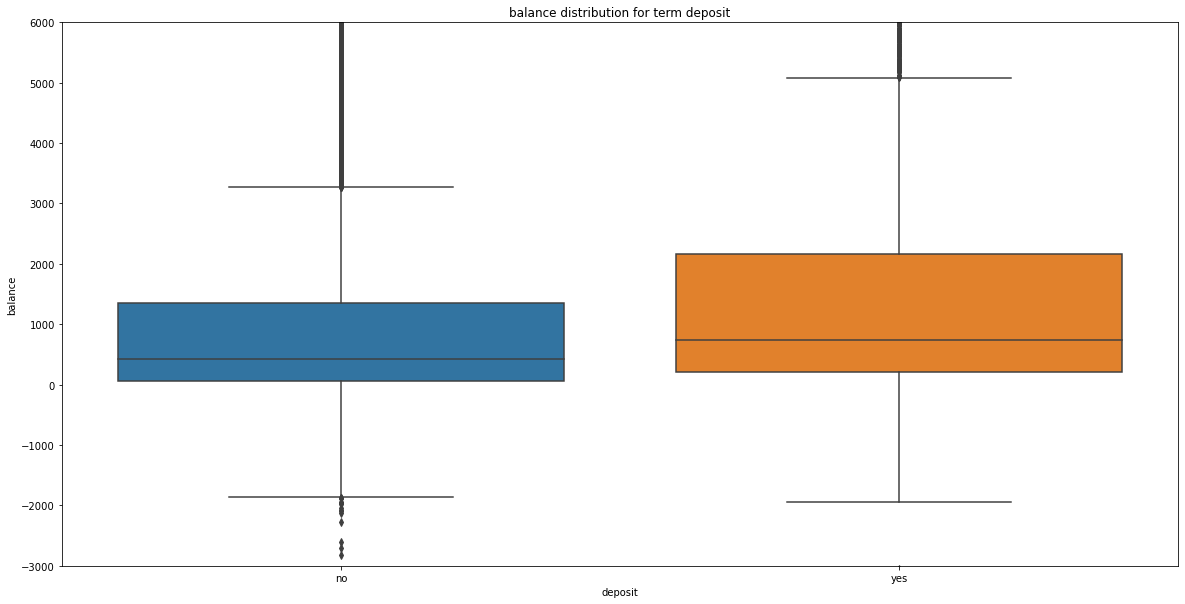

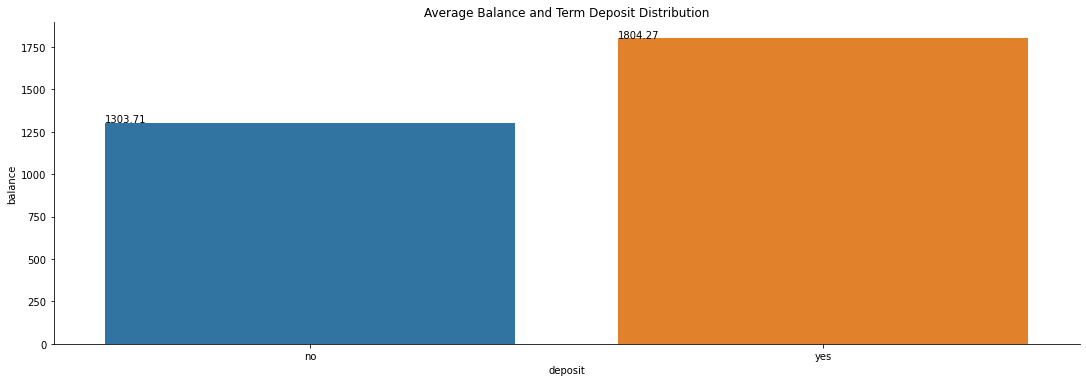

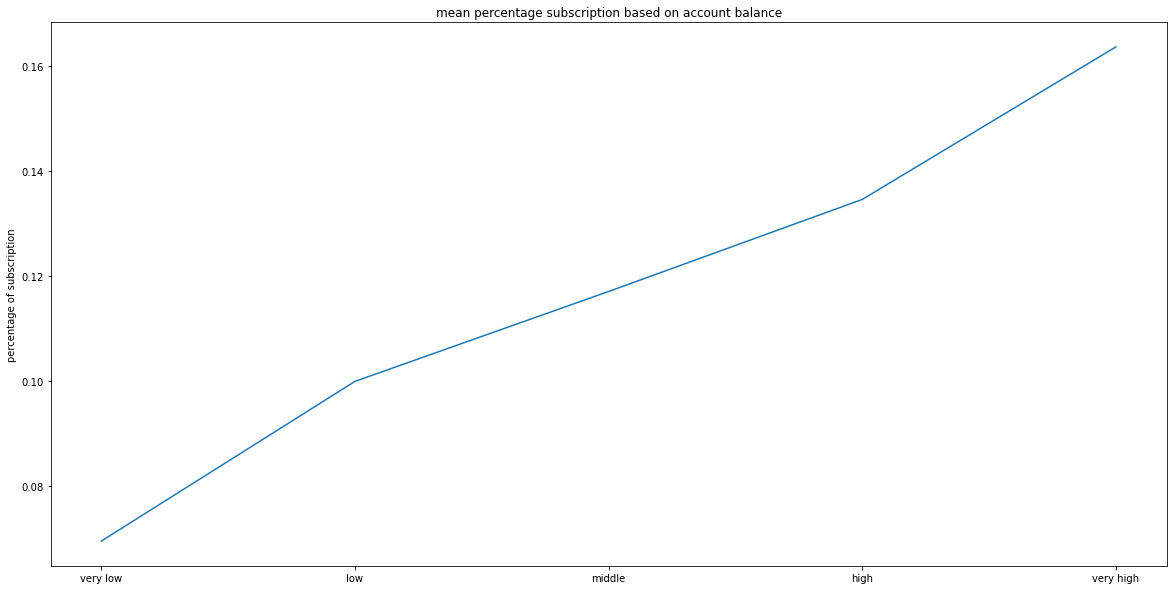

702 1860


In [22]:


#balance of those who have and dont have a term deposit
plt.figure(figsize=(20,10))
sns.boxplot(x='deposit',y='balance',data=bank_df)
plt.title('balance distribution for term deposit')
plt.ylim(-3000,6000)

mean_bal=bank_df.groupby('deposit')['balance'].mean()
mean_bal=mean_bal.rename('balance').reset_index()

g=sns.catplot(x='deposit',y='balance',kind='bar',data=mean_bal, height=5, aspect=3)
g.ax.set_title('Average Balance and Term Deposit Distribution')
for p in g.ax.patches:
    txt = str(p.get_height().round(2))
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)
df_new = cleaned_df.copy()

bin5=['very low','low', 'middle','high','very high']
df_new['balance_buckets'] = pd.qcut(df_new['balance'], q=[0, .2, .4, .6, .8, 1], labels=bin5, duplicates = 'drop')

mean_deposit = df_new.groupby(['balance_buckets'])['deposit'].mean()
print(mean_deposit)

plt.figure(figsize=(20,10))
plt.plot(mean_deposit.index, mean_deposit.values)
plt.title('mean percentage subscription based on account balance')
plt.ylabel('percentage of subscription')
plt.show()

high_bal=df_new[df_new['balance_buckets']=='high']['balance'].min()
very_high_bal =df_new[df_new['balance_buckets']=='very high']['balance'].min()

print(high_bal,very_high_bal)

Balance

By identifying the correlation that customers that have higher balances have higher success rates of subscribing to a term deposit, we can target customers with high or very high balances to maintain a success rate over 15% reducing our call center outsourcing cost.
1)	customers who have subscribed to the current marketing campaign have higher median and mean balances, showing that customers with higher balances are more willing to make a term deposit because they have the resources to so

2)	the next marketing campaign should target customers with high to very high balances, such as balances greater than the average balance of $1303 of those who did not subscribe to a term deposit


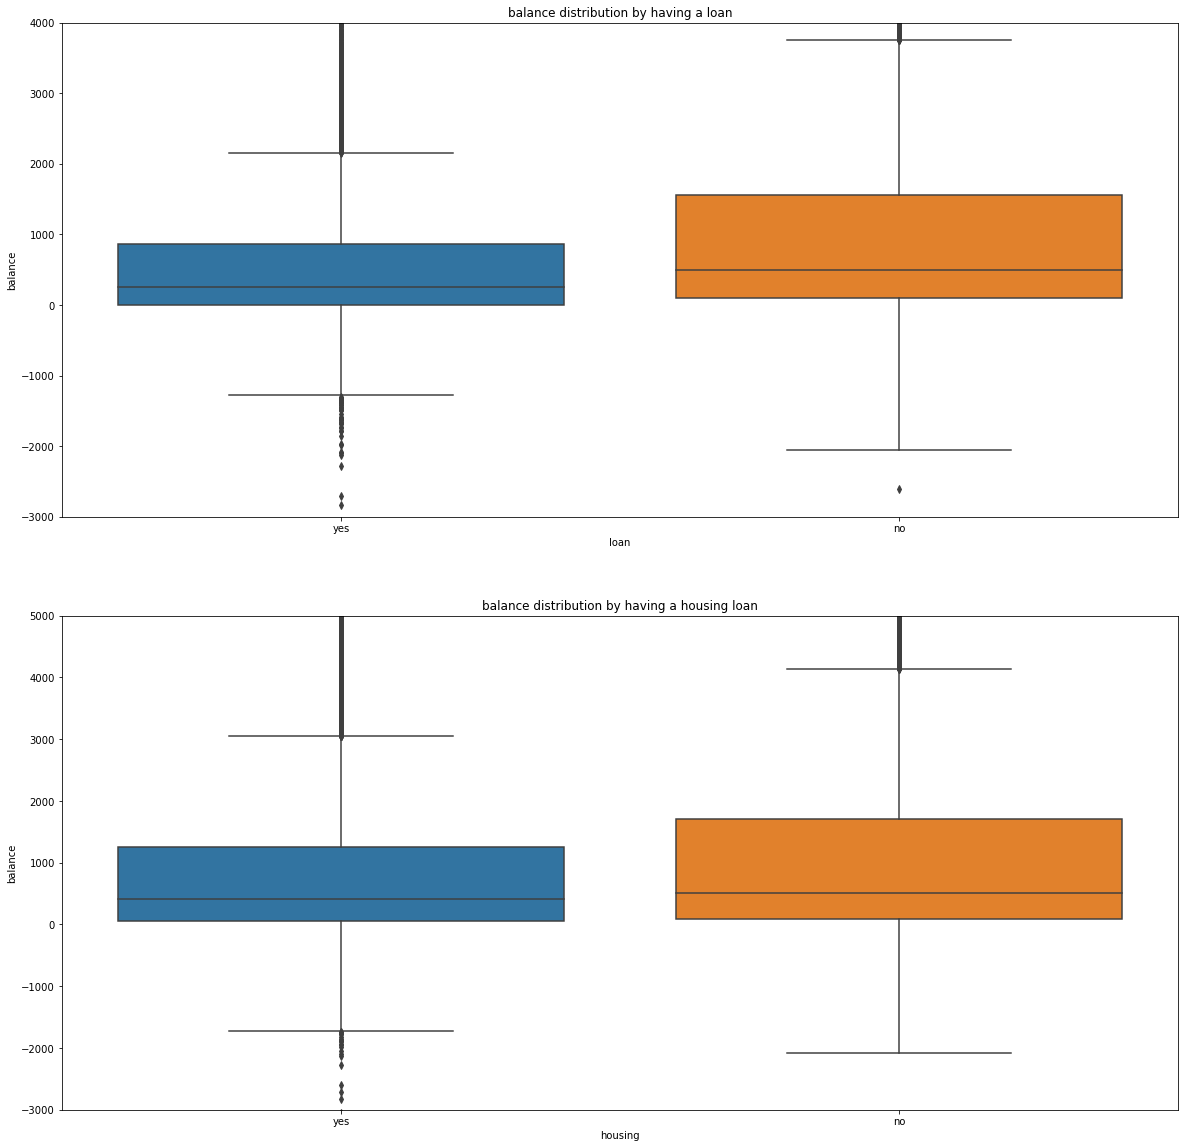

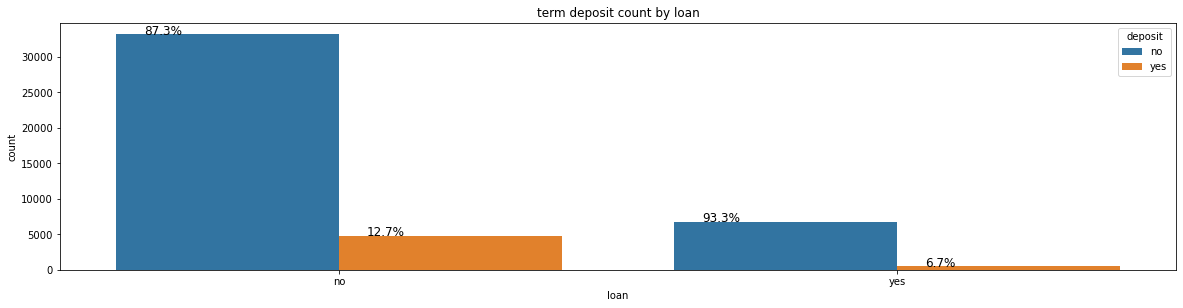

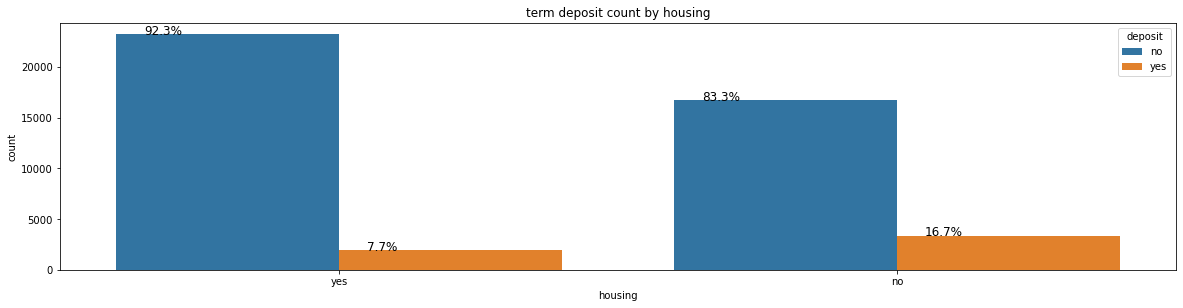

In [231]:
plt.figure(figsize=(20,20))
plt.subplot(211)
sns.boxplot(x='loan',y='balance',data=bank_df,order=['yes','no'])
plt.title('balance distribution by having a loan')
plt.ylim(-3000,4000)
plt.subplot(212)
sns.boxplot(x='housing',y='balance',data=bank_df,order=['yes','no'])
plt.title('balance distribution by having a housing loan')
plt.ylim(-3000,5000)
#loan count distrbution of deposits
def with_hue(plot, feature, Number_of_categories, hue_categories):
    a = [p.get_height() for p in plot.patches]
    patch = [p for p in plot.patches]
    for i in range(Number_of_categories):
        total = feature.value_counts().values[i]
        for j in range(hue_categories):
            percentage = '{:.1f}%'.format(100 * a[(j*Number_of_categories + i)]/total)
            x = patch[(j*Number_of_categories + i)].get_x() + patch[(j*Number_of_categories + i)].get_width() / 2 - 0.15
            y = patch[(j*Number_of_categories + i)].get_y() + patch[(j*Number_of_categories + i)].get_height() 
            ax.annotate(percentage, (x, y), size = 12)
    plt.show()
    
plt.figure(figsize=(20,10))
plt.subplot(211)
ax=sns.countplot(x='loan',data= bank_df,hue = 'deposit')
plt.title('term deposit count by loan')
with_hue(ax,bank_df['loan'],2,2)


plt.figure(figsize=(20,10))
plt.subplot(212)
ax=sns.countplot(x='housing',data= bank_df,hue = 'deposit')
plt.title('term deposit count by housing')
with_hue(ax,bank_df['housing'],2,2)


loan and housing

Having already identified that there is a direct positive correlation between balance and customers making a term deposit, we can now use housing and loans to filter out customers during the next campaign, aiding in reducing even more outsourced calls 
1)	Customers that don’t have any type of loan tend to have higher average and median balances and are more likely to subscribe to a term deposit as they are more financially sound 

2)	Those without a loan have a 12.7% chance to subscribe and those without a housing loan have a 16.7% chance to subscribe, we should focus on customers with no loans on top of those with higher balances 


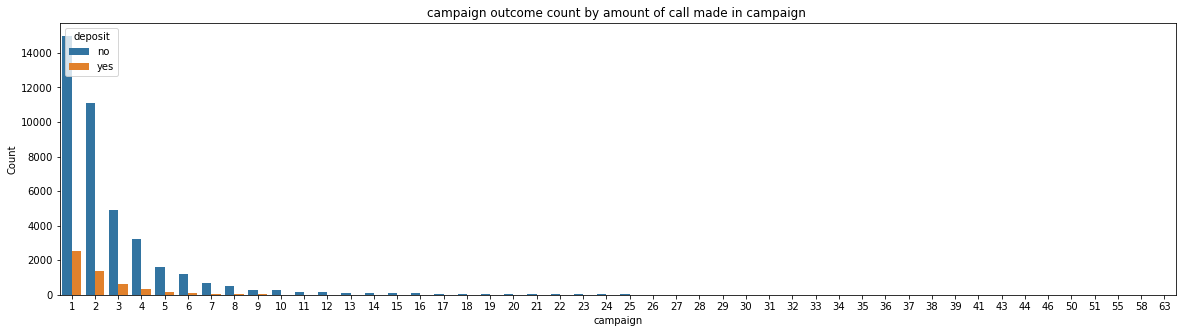

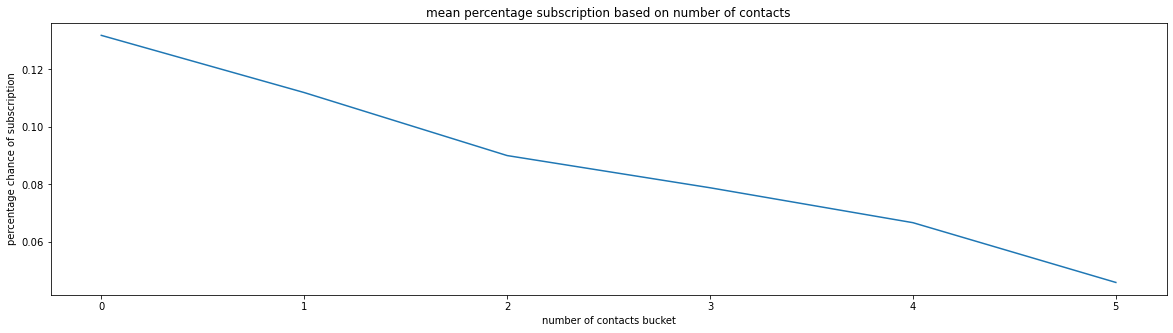

124956


4

In [26]:

plt.figure(figsize=(20,5))
sns.countplot(x='campaign',data= bank_df,hue = 'deposit')
plt.ylabel('Count')
plt.title('campaign outcome count by amount of call made in campaign ')
plt.show()
           
df_new = cleaned_df.copy()
df_new['campaign_buckets'] = pd.qcut(df_new['campaign'],20, labels=False, duplicates = 'drop')
mean_campaign = df_new.groupby(['campaign_buckets'])['deposit'].mean()

plt.figure(figsize=(20,5))
plt.plot(mean_campaign.index, mean_campaign.values)
plt.title('mean percentage subscription based on number of contacts')
plt.xlabel('number of contacts bucket')
plt.ylabel('percentage chance of subscription')
plt.show()

number=bank_df['campaign'].sum()
print(number)

df_new[df_new['campaign_buckets']==2]['campaign'].min()


Campaign

There exists a correlation between the number of calls being made to customers and the success rate of them subscribing to a term deposit during our telephonic marketing. Increased calls show a decrease in the success rate of a customer willing to subscribe. It would be ideal to limit the numbers of call to a maximum of 4 calls as anything more show diminishing returns and increase our call center expenses.


258.1630797814691


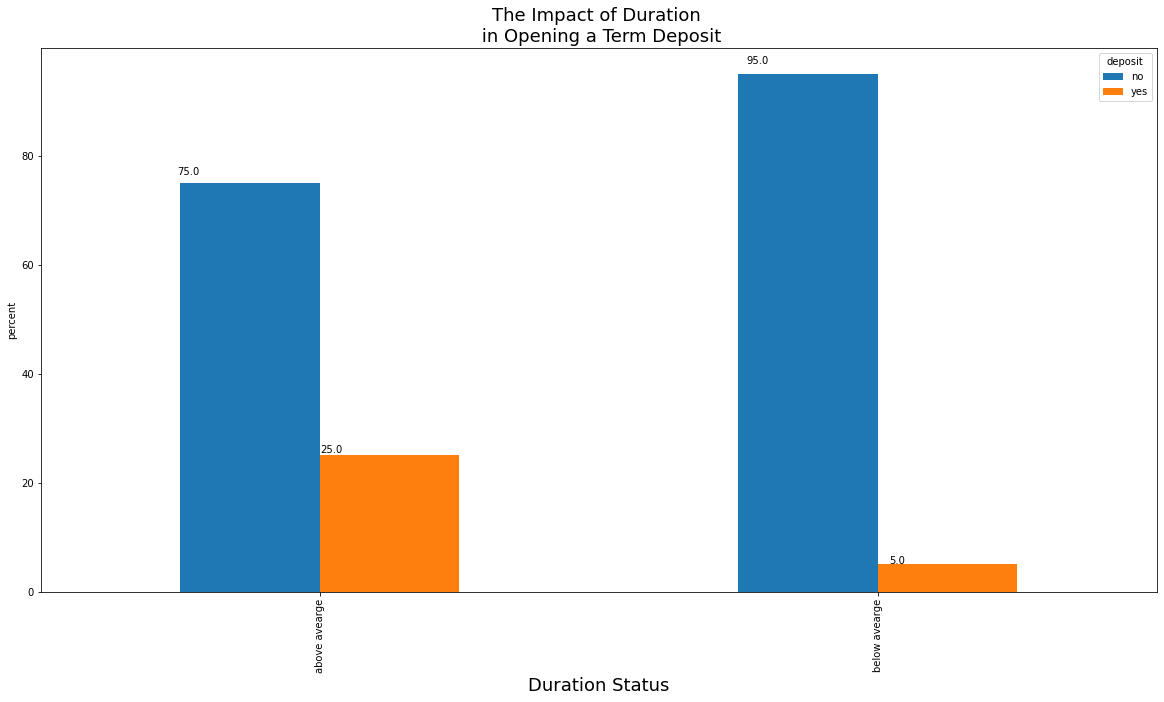

4918


In [13]:
pct_term = pd.crosstab(bank_df['duration status'], bank_df['deposit']).apply(lambda r: round(r/r.sum(), 2) * 100, axis=1)


mean_dur=bank_df['duration'].mean()
print(mean_dur)
ax = pct_term.plot(kind='bar', stacked=False, figsize=(20,10))
plt.title("The Impact of Duration \n in Opening a Term Deposit", fontsize=18)
plt.ylabel('percent')
plt.xlabel("Duration Status", fontsize=18);


for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.02, p.get_height() * 1.02))
    

plt.show()
max_dur=bank_df['duration'].max()
print(max_dur)

Durations

Being the top-ranking p value attribute, last call duration was highly correlated to current customer term deposit subscription. Customers who have higher than the average call duration of approximately 5 minutes have a 25% or subscribing opposed to only 5% from those who spend less than the average time on the call.  
1)	 Unlike the other categories like balance or any other customer attribute, duration is only registered once the marketing campaign begins. Making it an impractical forecast attribute for the start of the next marking campaign.

2)	Duration time still has an important role in the action plan to reduce call center calls though, duration can be used to determine which customers will recieve another call if the the previous call did not result in a term deposit and if the duration is greater or equal to the bench mark average duration of 5 minutes.


  index  count
0    no  39922
1   yes   5289


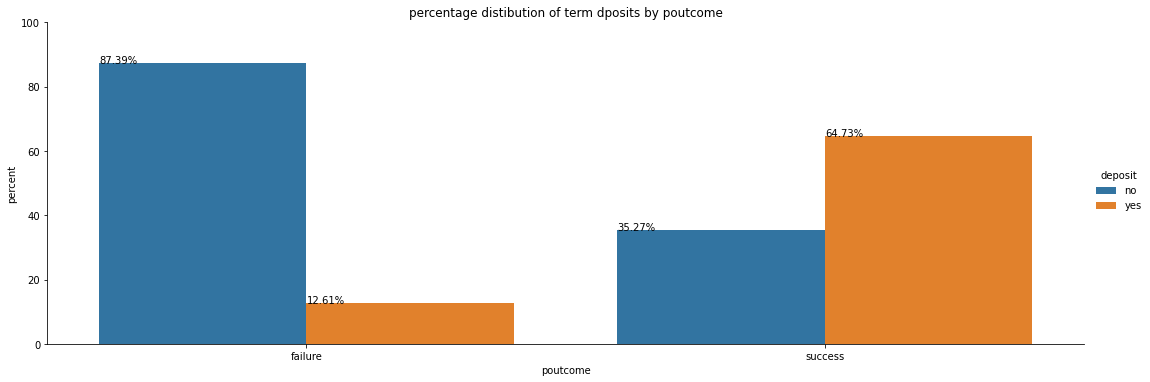

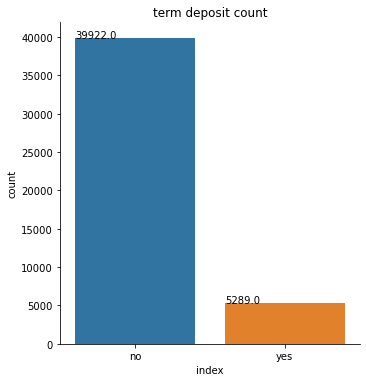

In [8]:
df2=bank_df[(bank_df['poutcome']!='unknown')&(bank_df['poutcome']!='other')]
df2=df2.groupby('poutcome')['deposit'].value_counts(normalize=True)
df2=df2.mul(100)
df2=df2.rename('percent').reset_index()

g=sns.catplot(x='poutcome',y='percent',hue='deposit',kind='bar',data=df2, height=5, aspect=3)
g.ax.set_ylim(0,100)
g.ax.set_title('percentage distibution of term dposits by poutcome')
for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)
    


df3=bank_df['deposit'].value_counts()
df3=df3.rename('count').reset_index()
print(df3)
g=sns.catplot(x='index',y='count',kind='bar',data=df3)
g.ax.set_title('term deposit count')
for p in g.ax.patches:
    txt = str(p.get_height().round(2))
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)

    


P-outcome(the outcome of the last campaign)

Our analysis has shown that P-outcome success is highly correlated to term deposit subscriptions for the current campaign. In fact, customers who previously subscribed to a term deposit had a 64.7% chance to subscribe to the current campaign. Moving forward for our next campaign we should seek out the 5289 customers that subscribed to a term deposit for the current campaign to increase subscription successes.

   month deposit  duration   cost
0    apr      no    606075  10101
1    apr     yes    267951   4466
2    aug      no   1080576  18010
3    aug     yes    371240   6187
4    dec      no     29318    489
5    dec     yes     41158    686
6    feb      no    464252   7738
7    feb     yes    193490   3225
8    jan      no    299462   4991
9    jan     yes     76851   1281
10   jul      no   1416273  23605
11   jul     yes    431417   7190
12   jun      no    988682  16478
13   jun     yes    309650   5161
14   mar      no     41484    691
15   mar     yes     75095   1252
16   may      no   2955064  49251
17   may     yes    636792  10613
18   nov      no    781263  13021
19   nov     yes    223737   3729
20   oct      no     98840   1647
21   oct     yes    113927   1899
22   sep      no     68771   1146
23   sep     yes    100443   1674
deposit
no     147168
yes     47363
Name: cost, dtype: float64
deposit
no     39922
yes     5289
Name: count, dtype: int64


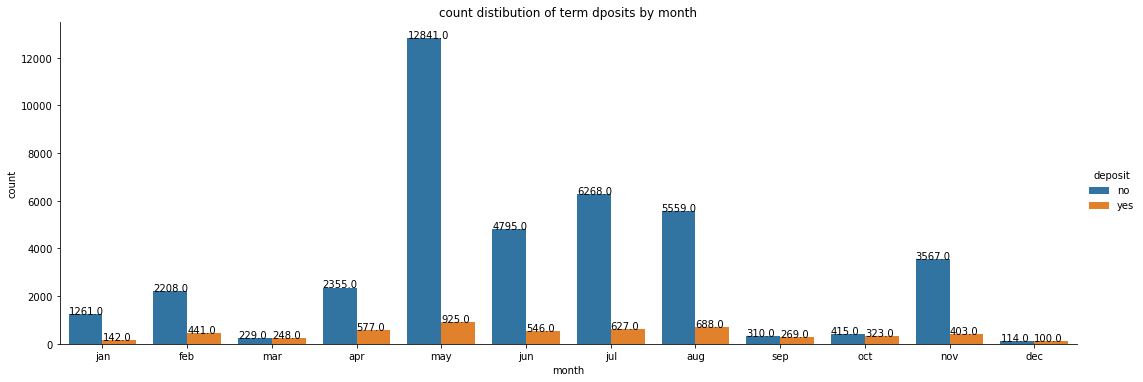

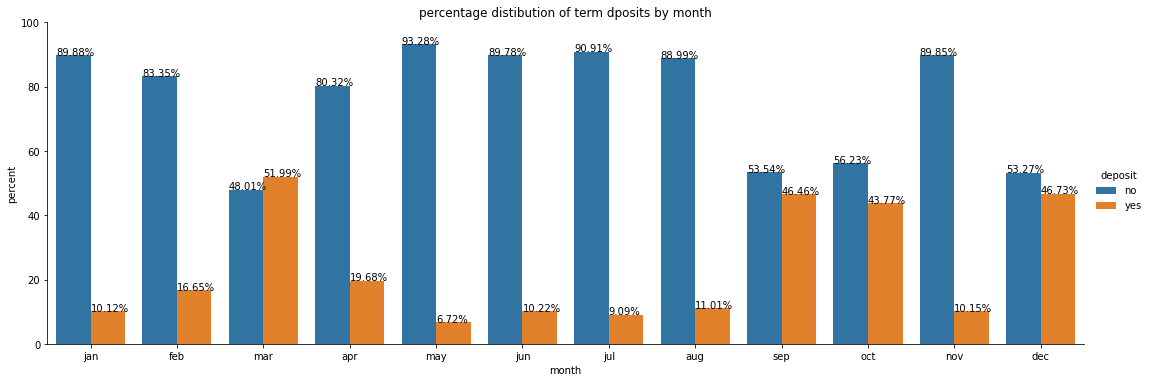

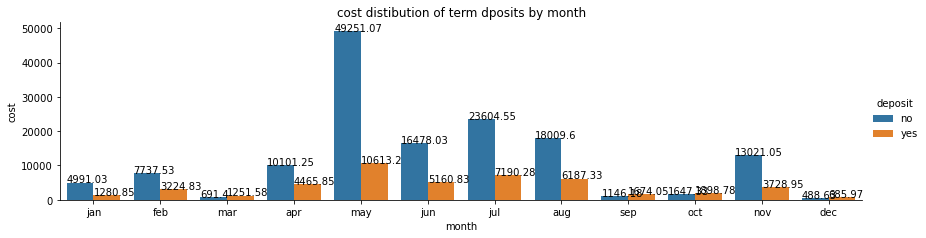

In [8]:
df1=bank_df.groupby('month')['deposit'].value_counts(normalize=False)
df1=df1.rename('count').reset_index()


df2=bank_df.groupby('month')['deposit'].value_counts(normalize=True)
df2=df2.mul(100)
df2=df2.rename('percent').reset_index()

g=sns.catplot(x='month',y='count',hue='deposit',kind='bar',data=df1, height=5, aspect=3,order=('jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec'))
g.ax.set_title('count distibution of term dposits by month')
for p in g.ax.patches:
    txt = str(p.get_height().round(2))
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)

g=sns.catplot(x='month',y='percent',hue='deposit',kind='bar',data=df2, height=5, aspect=3,order=('jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec'))
g.ax.set_ylim(0,100)
g.ax.set_title('percentage distibution of term dposits by month')
for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)

df_c=bank_df[['month','deposit','duration']]
df_c=df_c.groupby(['month','deposit'])['duration'].sum()
df_c=df_c.rename('duration').reset_index()
df_c['cost']=df_c['duration']/(60)
pd.set_option('precision',0)
print(df_c)
g=sns.catplot(x='month',y='cost',hue='deposit',kind='bar',data=df_c, height=3, aspect=4,order=('jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec'))
g.ax.set_title('cost distibution of term dposits by month')
for p in g.ax.patches:
    txt = str(p.get_height().round(2))
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)
    
df_c=df_c.groupby(['deposit'])['cost'].sum()
print(df_c)
df1=df1.groupby(['deposit'])['count'].sum()
print(df1) 

Months

The distribution of call center activity by month has revealed to us that the summer months produce underwhelming results with a large disparity between success and failures with only 10% success rates in those months. And that March, September, October and December had extremely low activity but produced results of 40% or higher for term deposit success. It is clear there needs to be a better allocation in resources to make our resource expenditures more beneficial.

1) The increased call activity in the summer months were very wasteful and need to be avoided for the next campaign

2) The call center major activity time should be reallocated to March, September, October and December for maximum effectiveness

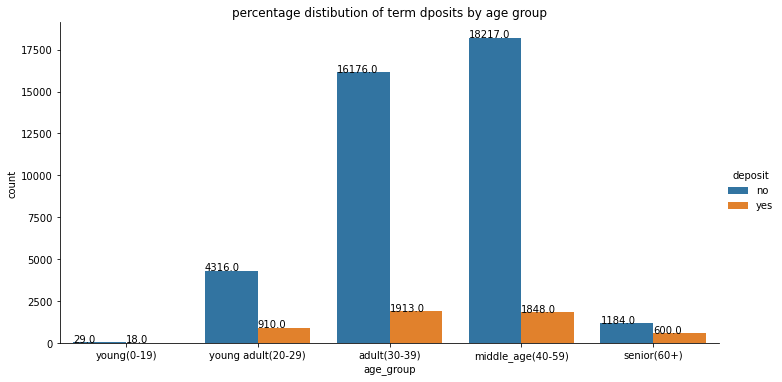

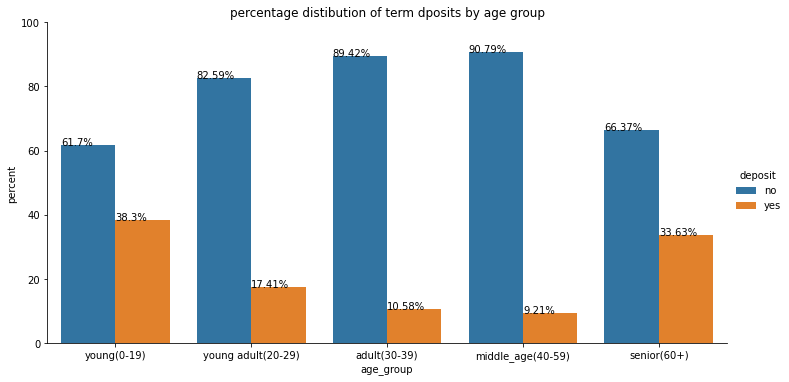

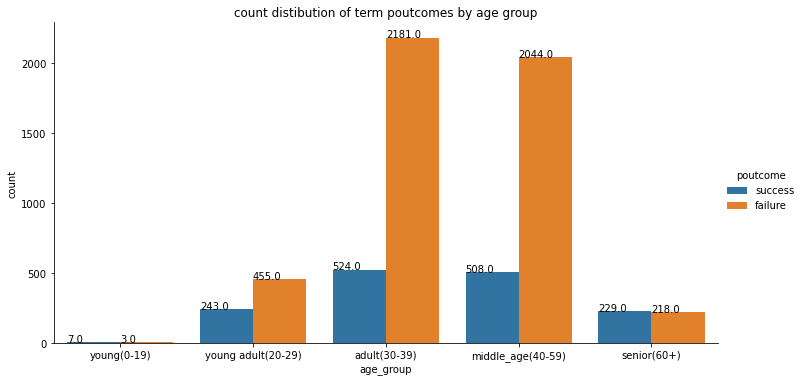

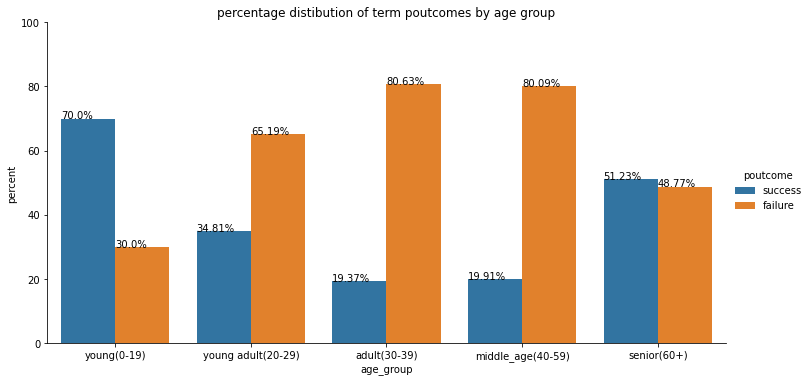

In [20]:
#Age 
#count current capaign
df1=bank_df.groupby('age_group')['deposit'].value_counts(normalize=False)
df1=df1.rename('count').reset_index()
#normalized percentage current campaign
df2=bank_df.groupby('age_group')['deposit'].value_counts(normalize=True)
df2=df2.mul(100)
df2=df2.rename('percent').reset_index()



g=sns.catplot(x='age_group',y='count',hue='deposit',kind='bar',data=df1, height=5, aspect=2)
g.ax.set_title('percentage distibution of term dposits by age group')
for p in g.ax.patches:
    txt = str(p.get_height().round(2))
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)

g=sns.catplot(x='age_group',y='percent',hue='deposit',kind='bar',data=df2, height=5, aspect=2)
g.ax.set_ylim(0,100)
g.ax.set_title('percentage distibution of term dposits by age group')
for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)
    

plt.show()

#count previous poutcome 
df3=bank_df.groupby('age_group')['poutcome'].value_counts(normalize=False)
df3=df3.rename('count').reset_index()
#normalized percentage previous poutcome
df4=bank_df[(bank_df['poutcome']!='unknown')&(bank_df['poutcome']!='other')]
df4=df4.groupby('age_group')['poutcome'].value_counts(normalize=True)
df4=df4.mul(100)
df4=df4.rename('percent').reset_index()

g=sns.catplot(x='age_group',y='count',hue='poutcome',kind='bar',data=df3[(df3['poutcome']!='unknown')&(df3['poutcome']!='other')], height=5, aspect=2)
g.ax.set_title('count distibution of term poutcomes by age group')
for p in g.ax.patches:
    txt = str(p.get_height().round(2)) 
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)

g=sns.catplot(x='age_group',y='percent',hue='poutcome',kind='bar',data=df4, height=5, aspect=2)
g.ax.set_ylim(0,100)
g.ax.set_title('percentage distibution of term poutcomes by age group')
for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)
#$plt.figure(figsize=(20,10))
#sns.histplot(bank_df,x='age_group',hue='deposit',stat='probability', multiple='dodge')

Age

Most of our current customers in our portfolio are between the ages of 30 and 60 but these clients should not be our main focus. From our data, we can clearly see that our next campaign should target customers under 30 and over 60 as they have a 17% and 33% chance success rate in their age group to subscribe to a term deposit.
1)	Outcomes from the previous campaign reinforce the idea that these 2 age group categories should be targeted with a 34% and 51% chance of success respectively for those under 30 and those over 60


(0.0, 6000.0)

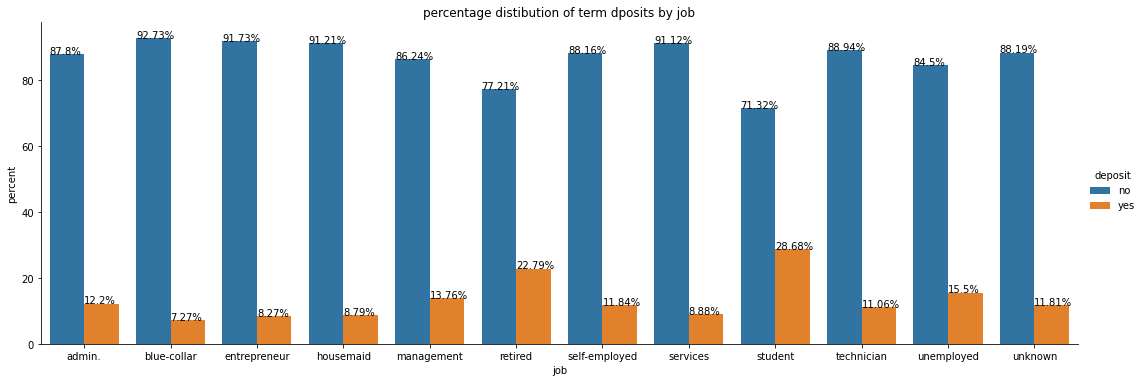

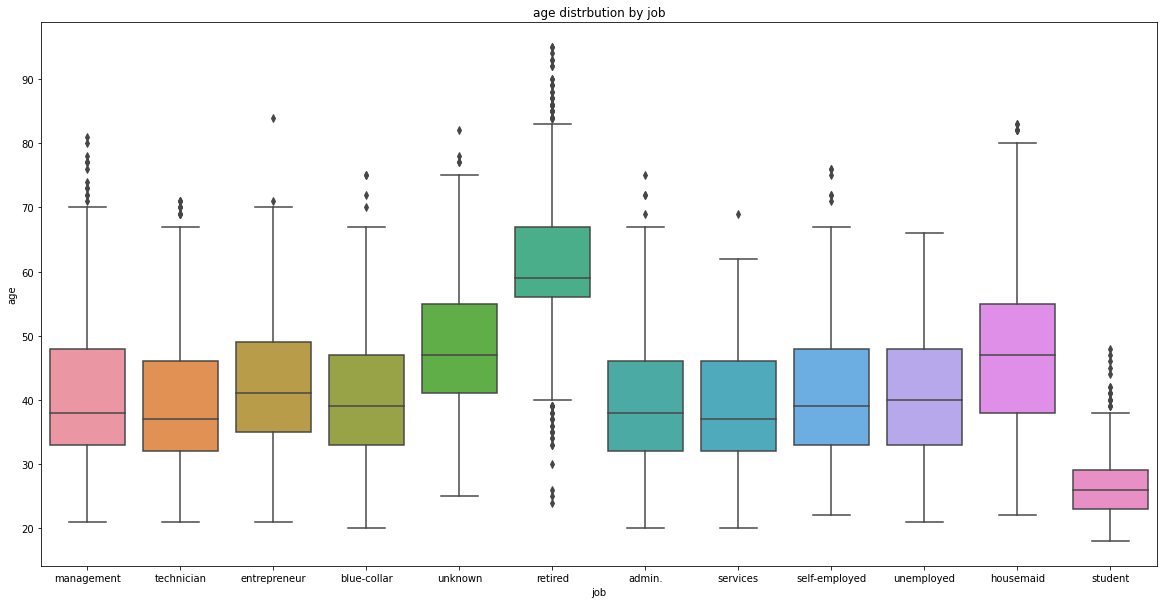

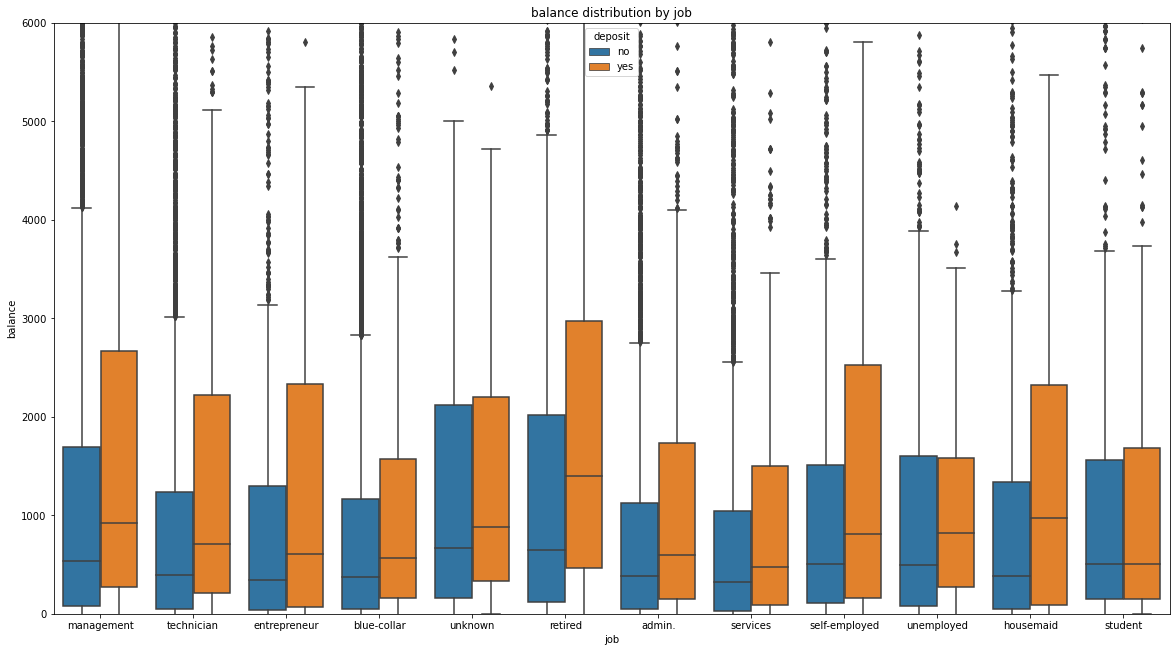

In [13]:
#age and occupation 
df=bank_df.groupby('job')['deposit'].value_counts(normalize=True)
df=df.mul(100)
df=df.rename('percent').reset_index()

g=sns.catplot(x='job',y='percent',hue='deposit',kind='bar',data=df, height=5, aspect=3)
g.ax.set_title('percentage distibution of term dposits by job')
for p in g.ax.patches:
    txt = str(p.get_height().round(2))+'%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)


plt.figure(figsize=(20,10))
sns.boxplot(x='job',y='age',data=bank_df)
plt.title('age distrbution by job')


#job and balance
plt.figure(figsize=(20,50))
plt.subplot(4,1,4)
sns.boxplot(x='job',y='balance',hue='deposit',data=bank_df)
plt.title('balance distribution by job')
plt.ylim(0,6000)



Job

Our data indicates that retired customers and students are more likely to subscribe to a term deposit and unsurprisingly the age groups for retired customers are over the age of 60 and the age group for students is primarily under the age of 30. Targeting these customers will aid in reducing call center costs.
1)	Even though retired customers and students show higher percentages to subscribe to a term deposit, retired customers should be given more attention for the next campaign when looking at occupation filters to reduce the number of calls being made, as they are more financially equipped to make a term deposit. We already established that increased balance correlates to a higher success rate and our retired customers exhibit the largest median balances between all customers making them highly desirable customers in our next campaign.
